In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# hyperparameter tuning tools
import optuna

# warnings setting
warnings.filterwarnings("ignore")

# dataframe setting
pd.set_option('display.max_columns', None)

# visualization setting
sns.set()
title_size = 18
y_title = 1.01
title_weight = 'bold'

# 1. Business Understanding

## 1.1. Business Objective

### 1.1.1. Background

Pada Perusahaan Telekomunikasi, salah satu tantangan utama adalah menjaga agar pelanggan tetap setia. Setiap bulannya, ada sejumlah pelanggan yang memutuskan untuk berhenti menggunakan layanan (churn), dan hal ini tentu merugikan perusahaan, baik dari sisi pendapatan maupun pertumbuhan.

### 1.1.2. Business Objectives

Target yang ingin dicapai perusahaan adalah:

- Mengurangi jumlah customer yang berhenti berlangganan
- Meningkatkan jumlah customer
- Meningkatkan customer engagement
- Meningkatkan jumlah pendapatan Perusahaan


### 1.1.3. Business Success Criteria

Kriteria sukses dari target yang ingin dicapai adalah:

- Penurunan Churn Rate
- Peningkatan kepuasan customer
- Peningkatkan kepuasan pelanggan
- Inovasi Produk dan Pengembangan Layanan


## 1.2. Data Science Goals

untuk mencapai sukses kriteria mengurangi jumlah customer churn diperlukan analisis yang mendalam terkait dengan data customer churn. oleh karena itu dibuatlah proyek data science.

### 1.2.1. Data science Goals

1. melakukan eksplorasi terhadap data customer churn untuk mengetahui faktor-faktor dan informasi yang berguna
2. membuat model predictive untuk mendeteksi customer churn

### 1.2.2. Data Science Success Criteria

1. didapatkan insight baru terkait data customer churn
2. akurasi model untuk memprediksi churn diatas 80%

# 2. Data Understanding

## 2.1 About The Variables


- Customer ID: ID unik yang digunakan untuk mengidentifikasi setiap pelanggan.
- Gender: Jenis kelamin pelanggan, biasanya berisi nilai 'Male' (Pria) atau 'Female' (Wanita).
- Senior Citizen: Apakah pelanggan merupakan warga senior (berusia lebih dari 65 tahun), dengan nilai 1 (Senior) atau 0 (Non-senior).
- Partner: Apakah pelanggan memiliki pasangan atau tidak, dengan nilai 'Yes' atau 'No'.
- Dependents: Apakah pelanggan memiliki tanggungan (seperti anak atau anggota keluarga lain), dengan nilai 'Yes' atau 'No'.
- Tenure: Lama pelanggan telah menggunakan layanan (dalam bulan).
- Phone Service: Apakah pelanggan memiliki layanan telepon, dengan nilai 'Yes' atau 'No'.
- Multiple Lines: Apakah pelanggan memiliki lebih dari satu jalur telepon, dengan nilai 'Yes', 'No', atau 'No phone service'.
- Internet Service: Jenis layanan internet yang digunakan oleh pelanggan, misalnya 'DSL', 'Fiber optic', atau 'No' (tidak memiliki layanan internet).
- Online Security: Apakah pelanggan memiliki layanan keamanan online, dengan nilai 'Yes', 'No', atau 'No internet service'.
- Online Backup: Apakah pelanggan memiliki layanan backup online, dengan nilai 'Yes', 'No', atau 'No internet service'.
- Device Protection: Apakah pelanggan memiliki layanan perlindungan perangkat, dengan nilai 'Yes', 'No', atau 'No internet service'.
- Tech Support: Apakah pelanggan memiliki layanan dukungan teknis, dengan nilai 'Yes', 'No', atau 'No internet service'.
- Streaming TV: Apakah pelanggan menggunakan layanan streaming TV, dengan nilai 'Yes', 'No', atau 'No internet service'.
- Streaming Movies: Apakah pelanggan menggunakan layanan streaming film, dengan nilai 'Yes', 'No', atau 'No internet service'.
- Contract: Jenis kontrak yang digunakan oleh pelanggan, seperti 'Month-to-month', 'One year', atau 'Two year'.
- Paperless Billing: Apakah pelanggan menggunakan tagihan tanpa kertas (paperless billing), dengan nilai 'Yes' atau 'No'.
- Payment Method: Metode pembayaran yang digunakan oleh pelanggan, seperti 'Electronic check', 'Mailed check', 'Bank transfer', atau 'Credit card'.
- Monthly Charges: Jumlah tagihan bulanan yang dibayar oleh pelanggan.
- Total Charges: Jumlah total yang telah dibayarkan oleh pelanggan selama menjadi pelanggan
- Churn: Apakah pelanggan churn (berhenti menggunakan layanan), dengan nilai 'Yes' atau 'No'.2.1 Feature Explanation

## 2.2. Data Collection

**import data**

In [ ]:
churn_df = pd.read_csv('data.csv')
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2.3. Data Information

**data information**

In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


total charges seharusnya bertipe numerik tetapi oleh sistem dideteksi sebagai object. sehingga kita perlu melakukan pengubahan

In [ ]:
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

errors='coerce' -> Parameter ini berguna supaya kalau ada nilai yang tidak bisa diubah jadi angka, nilainya akan langsung diganti dengan NaN (Not a Number). Jadi, kalau ada kesalahan seperti data berisi teks atau karakter yang bukan angka, prosesnya tetap bisa jalan tanpa berhenti karena error.

In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


senior citizen seharusnya bertipe data category, karena pada data diwakili dengan angka 1 dan 0 sehingga oleh sistem dideteksi sebagai data numerik. oleh karena itu perlu kita lakukan perubahan tipe data ke category

In [ ]:
churn_df['SeniorCitizen'] = churn_df['SeniorCitizen'].astype('category')

In [ ]:
churn_df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,category
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


**numerical data selection**

In [ ]:
num_features =  churn_df.select_dtypes(include='number').columns.tolist()

In [ ]:
num_features

['tenure', 'MonthlyCharges', 'TotalCharges']

**categorical data selection**

In [ ]:
cat_features = churn_df.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
cat_features

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

# 3. Data Perparation

## 3.1. Data Cleansing

### 3.1.1. Check Duplicates

In [ ]:
churn_df.duplicated().sum()

0

### 3.1.2. Missing Values

In [ ]:
churn_df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
churn_df.query('TotalCharges.isna()')[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

,tenure,MonthlyCharges,TotalCharges,Churn
488,0,52.55,NaN,No
753,0,20.25,NaN,No
936,0,80.85,NaN,No
1082,0,25.75,NaN,No
1340,0,56.05,NaN,No
3331,0,19.85,NaN,No
3826,0,25.35,NaN,No
4380,0,20.00,NaN,No
5218,0,19.70,NaN,No
6670,0,73.35,NaN,No


In [ ]:
churn_df.query('tenure == 0')[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

,tenure,MonthlyCharges,TotalCharges,Churn
488,0,52.55,NaN,No
753,0,20.25,NaN,No
936,0,80.85,NaN,No
1082,0,25.75,NaN,No
1340,0,56.05,NaN,No
3331,0,19.85,NaN,No
3826,0,25.35,NaN,No
4380,0,20.00,NaN,No
5218,0,19.70,NaN,No
6670,0,73.35,NaN,No


setelah kita telusuri ternyata missing value pada total charges disebabkan oleh customer yang berlangganan kurang dari sebulan.

**missing value imputation**

total charges merupakan jumlah total yang telah dibayarkan oleh pelanggan selama berlangganan. dimana total charges didapatkan dari perkalian antara tenure dengan monthly chrages.

In [ ]:
churn_df[['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [ ]:
fig = px.scatter_3d(churn_df, x='tenure', y='MonthlyCharges', z='TotalCharges', title='3D Scatter Plot of Tenure, Monthly Charges, Total Charges')
fig.show()

imputasi yang kita lakukan adalah dengan mengabil nilai monthly charges

In [ ]:
churn_df.query('TotalCharges.isna()')['MonthlyCharges'].values

array([52.55, 20.25, 80.85, 25.75, 56.05, 19.85, 25.35, 20.  , 19.7 ,
       73.35, 61.9 ])

In [ ]:
total_charges_mv_index = churn_df.query('TotalCharges.isna()')['TotalCharges'].index

In [ ]:
churn_df.loc[total_charges_mv_index, 'TotalCharges']

,TotalCharges
488,NaN
753,NaN
936,NaN
1082,NaN
1340,NaN
3331,NaN
3826,NaN
4380,NaN
5218,NaN
6670,NaN


In [ ]:
churn_df.loc[total_charges_mv_index, 'TotalCharges'] = churn_df.query('TotalCharges.isna()')['MonthlyCharges'].values

In [ ]:
churn_df.query('tenure == 0')[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

,tenure,MonthlyCharges,TotalCharges,Churn
488,0,52.55,52.55,No
753,0,20.25,20.25,No
936,0,80.85,80.85,No
1082,0,25.75,25.75,No
1340,0,56.05,56.05,No
3331,0,19.85,19.85,No
3826,0,25.35,25.35,No
4380,0,20.00,20.00,No
5218,0,19.70,19.70,No
6670,0,73.35,73.35,No


In [ ]:
churn_df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### 3.1.3. Outliers

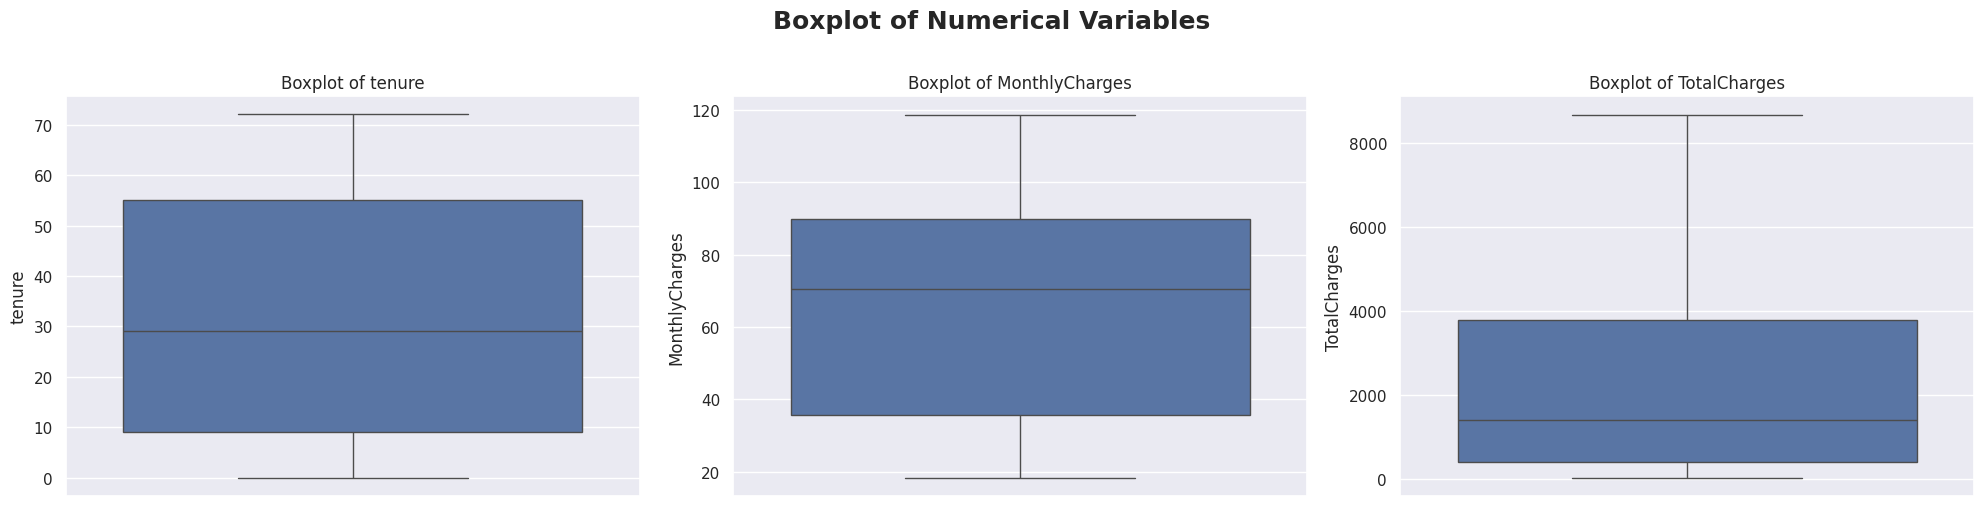

In [ ]:
fig, axes = plt.subplots(
    ncols=3,
    figsize=(20,5)
)

for i, col in enumerate(num_features):
    sns.boxplot(churn_df, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

plt.suptitle('Boxplot of Numerical Variables', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('Boxplot of Numerical variables.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

untuk keseluruhan data tidak dideteksi adanya outliers

## 3.2. Analysis

### 3.2.1. Descriptive Analysis

#### A. numerical data description

In [ ]:
churn_df[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.80,398.55,1394.55,3786.60,8684.80


Insight Tenure:
- Sekitar 25% pelanggan, atau kurang lebih 1.760 orang, telah berlangganan selama 9 bulan atau kurang. Ini berarti mereka telah menggunakan layanan kurang dari 1 tahun.
- 50% Setengah dari pelanggan, sekitar 3.522 orang, telah menggunakan layanan selama 29 bulan atau lebih, yang setara dengan lebih dari 2 tahun. Ini menunjukkan bahwa banyak pelanggan sudah memakai layanan telekomunikasi perusahaan ini selama waktu yang cukup lama.
- Sebanyak 75% pelanggan, sekitar 5.282 orang, berlangganan selama 55 bulan atau kurang, yang artinya sekitar 4,5 tahun.
- Ada beberapa pelanggan yang sudah berlangganan selama 6 tahun penuh, yang menunjukkan loyalitas jangka panjang terhadap layanan kita.

Insight Monthly Charges:
- Sekitar 25% pelanggan, atau sekitar 1.760 orang, membayar 35.50 dolar atau kurang per bulan. Mereka ini mungkin lebih memilih layanan biasa, mereka lebih sensitif terhadap harga dan perlu dikelola dengan baik agar tidak berhenti berlangganan.
- 50% Pelanggan, sekitar 3.522 orang, membayar lebih dari 70.35 dolar per bulan, yang menunjukkan bahwa banyak dari mereka memilih layanan di tingkat menengah ke atas. Ini memberikan peluang besar untuk melakukan upsell dengan menawarkan paket layanan tambahan atau fitur premium.
- Sebanyak 75% pelanggan, sekitar 5.282 orang, membayar hingga 89.85 dolar per bulan. Ini menunjukkan bahwa banyak pelanggan bersedia membayar untuk layanan yang lebih lengkap dan premium.

Insight Total Charges
- Sekitar 25% pelanggan, atau sekitar 1.758 orang, memiliki total tagihan 401.45 dolar atau kurang, yang mencerminkan mereka adalah pelanggan baru atau menggunakan layanan dasar. Perusahaan bisa memfokuskan strategi upsell kepada mereka untuk meningkatkan kontribusi mereka terhadap pendapatan.
- Setengah dari pelanggan, atau sekitar 3.516 orang, telah menghabiskan lebih dari 1.397.48 dolar selama masa berlangganan mereka. Ini menunjukkan bahwa pelanggan kita memberikan kontribusi yang signifikan terhadap pendapatan perusahaan.
- Sebanyak 75% pelanggan, atau sekitar 5.274 orang, telah menghabiskan hingga 3.794.74 dolar, menunjukkan bahwa sebagian besar pelanggan menggunakan layanan dalam jangka waktu yang panjang dan perlu mendapatkan perhatian lebih dalam bentuk program loyalitas atau layanan prioritas untuk memastikan mereka tetap setia.

doane bins estimator : An improved version of Sturges’ estimator that works better with non-normal datasets (source: numpy)

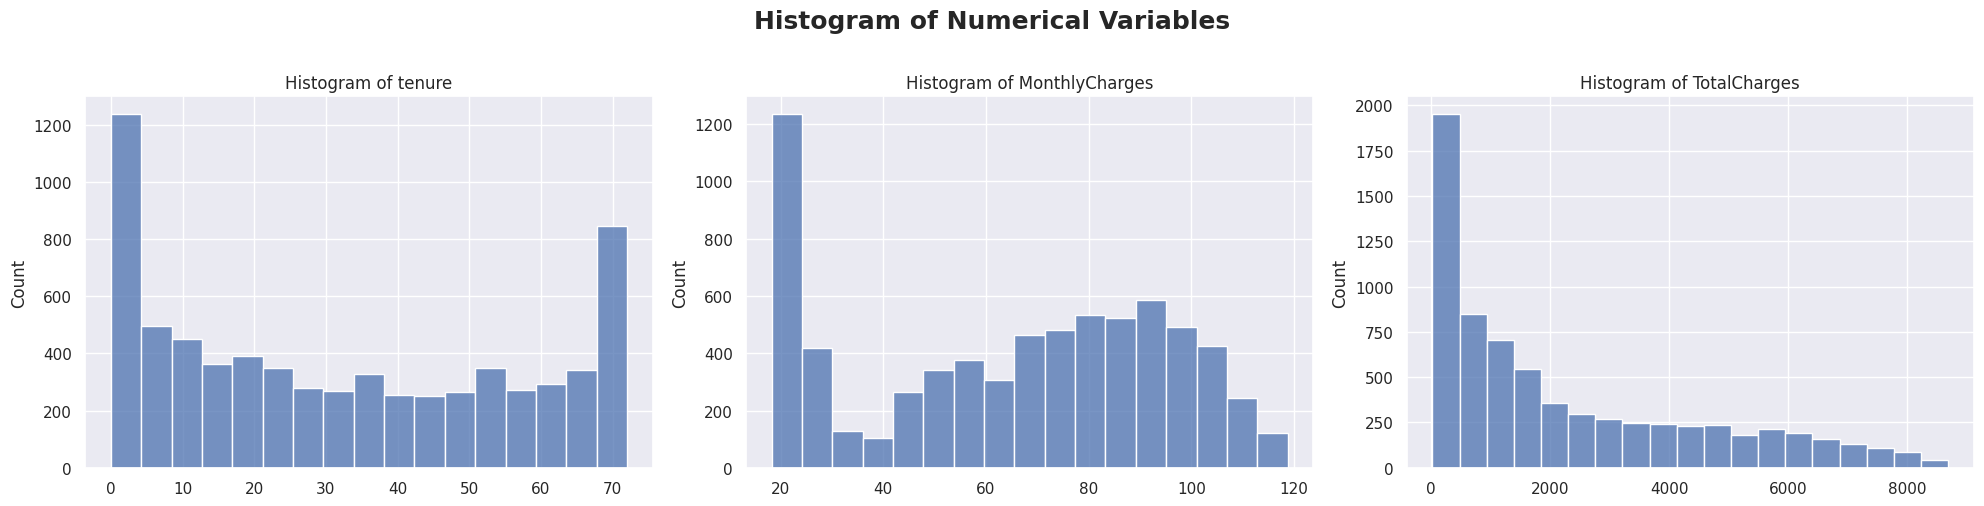

In [ ]:
fig, axes = plt.subplots(
    ncols=3,
    figsize=(20,5)
)

for i, col in enumerate(num_features):
    sns.histplot(churn_df, x=col, ax=axes[i], bins='doane')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.suptitle('Histogram of Numerical Variables', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('histogram of numerical variables.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

dari hasil histogram, data terlihat tidak berdistribusi normal, tetapi jika kita mengacu pada central limit theorem, data dengan jumlah sample lebih dari 30 bisa dikatakan data tersebut berdistribusi normal. karena ketika kita mengambil sample secara berulang-ulang dari populasi, dan kemudian menghitung nilai mean. dari setiap pengambilan sample nilai mean tersebut akan membentuk distribusi normal terlepas dari distribusi awalnya.

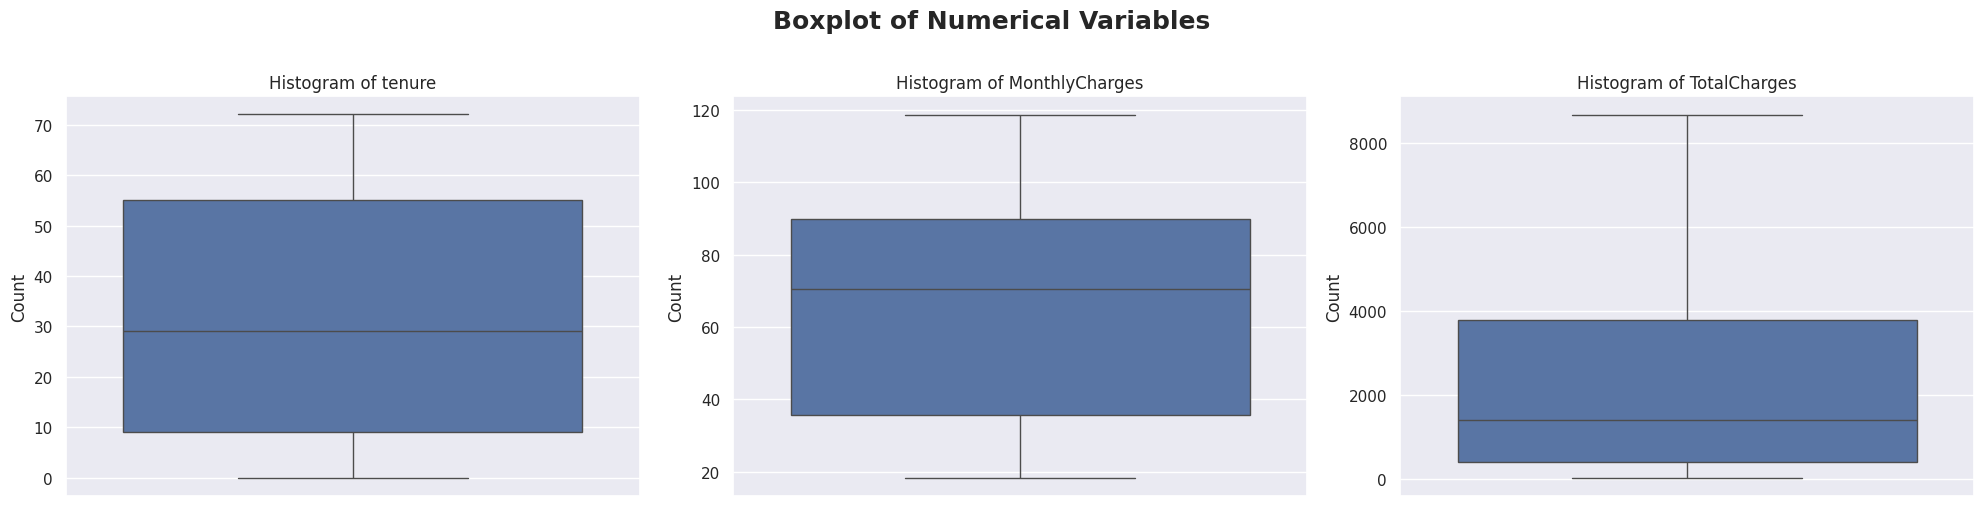

In [ ]:
fig, axes = plt.subplots(
    ncols=3,
    figsize=(20,5)
)

for i, col in enumerate(num_features):
    sns.boxplot(churn_df, y=col, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.suptitle('Boxplot of Numerical Variables', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('boxplot of numerical variables.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

#### B. categorical data description

In [ ]:
churn_df[cat_features].describe().T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088


churn merupakan target variables sehingga perlu di drop

customer id merupakan nilai unique yang mewakili customer sehingga tidak diperlukan dalam analisis

In [ ]:
churn_df.drop('customerID', axis=1, inplace=True)

In [ ]:
cat_features.remove('customerID')
cat_features.remove('Churn')

In [ ]:
cat_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
# kategorisasi variabel
customer_info = cat_features[:4]
services = cat_features[4:13]
account_info = cat_features[13:]

In [ ]:
print(f'customer information variables : \n{customer_info}')
print(f'services variables : \n{services}')
print(f'customer account information variables : \n{account_info}')

customer information variables : 
['gender', 'SeniorCitizen', 'Partner', 'Dependents']
services variables : 
['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
customer account information variables : 
['Contract', 'PaperlessBilling', 'PaymentMethod']


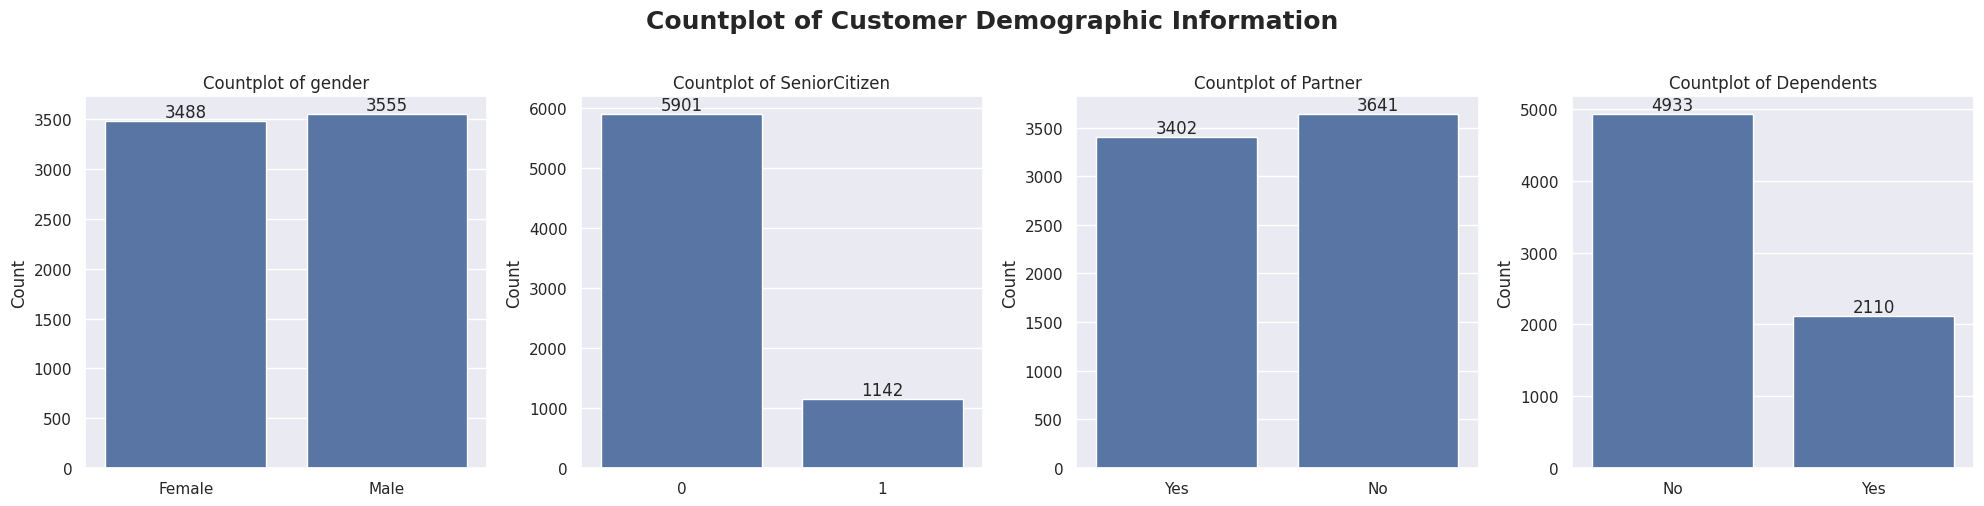

In [ ]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=4,
    figsize=(20,5)
)

axes = axes.flatten()

for i, col in enumerate(customer_info):
    sns.countplot(x=churn_df[col], ax=axes[i])
    axes[i].bar_label(axes[i].containers[0])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.suptitle('Countplot of Customer Demographic Information', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('countplot of customer demographic information.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

mayoritas rentang umur customer ada pada orang tua atau anak muda?

dari hasil visualisasi didapatkan mayoritas customer ada pada kalangan anak muda

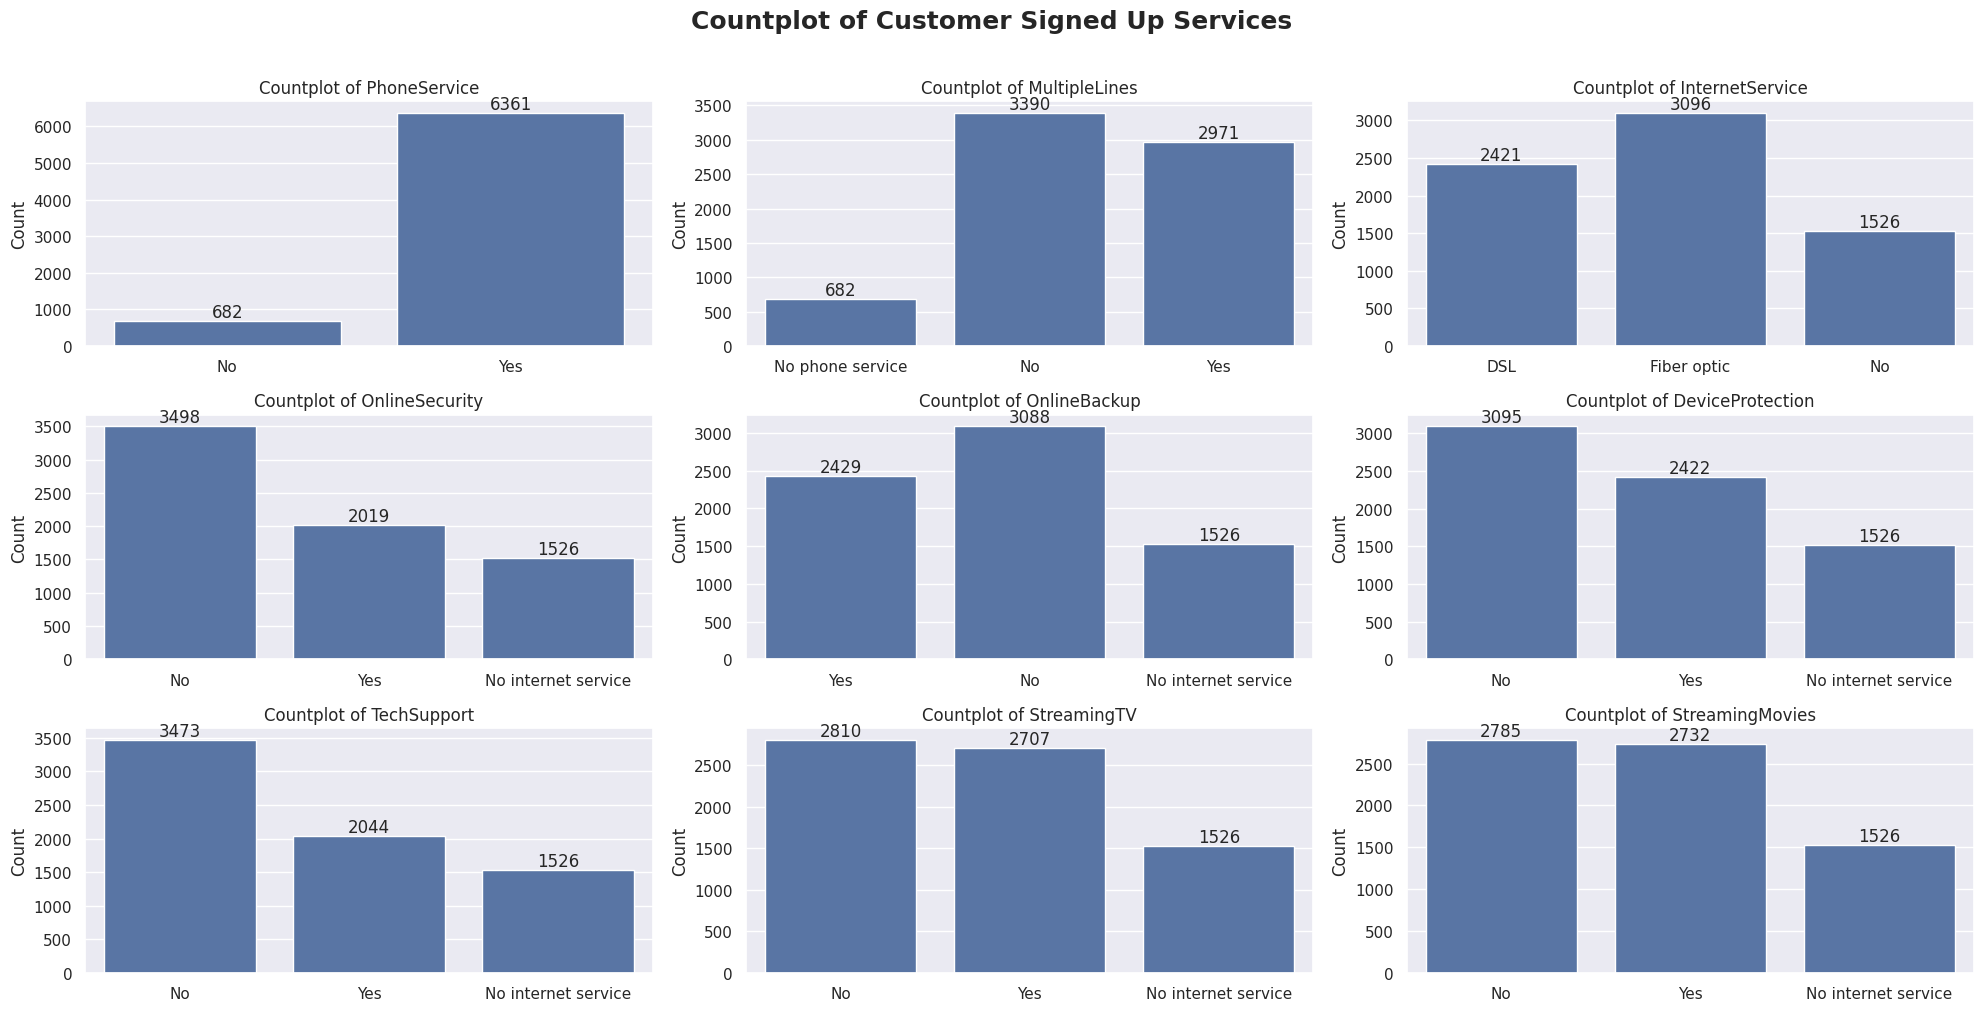

In [ ]:
fig, axes = plt.subplots(
    nrows=3,
    ncols=3,
    figsize=(20,10)
)

axes = axes.flatten()

for i, col in enumerate(services):
    sns.countplot(x=churn_df[col], ax=axes[i])
    axes[i].bar_label(axes[i].containers[0])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.suptitle('Countplot of Customer Signed Up Services', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('countplot of customer signed up services.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

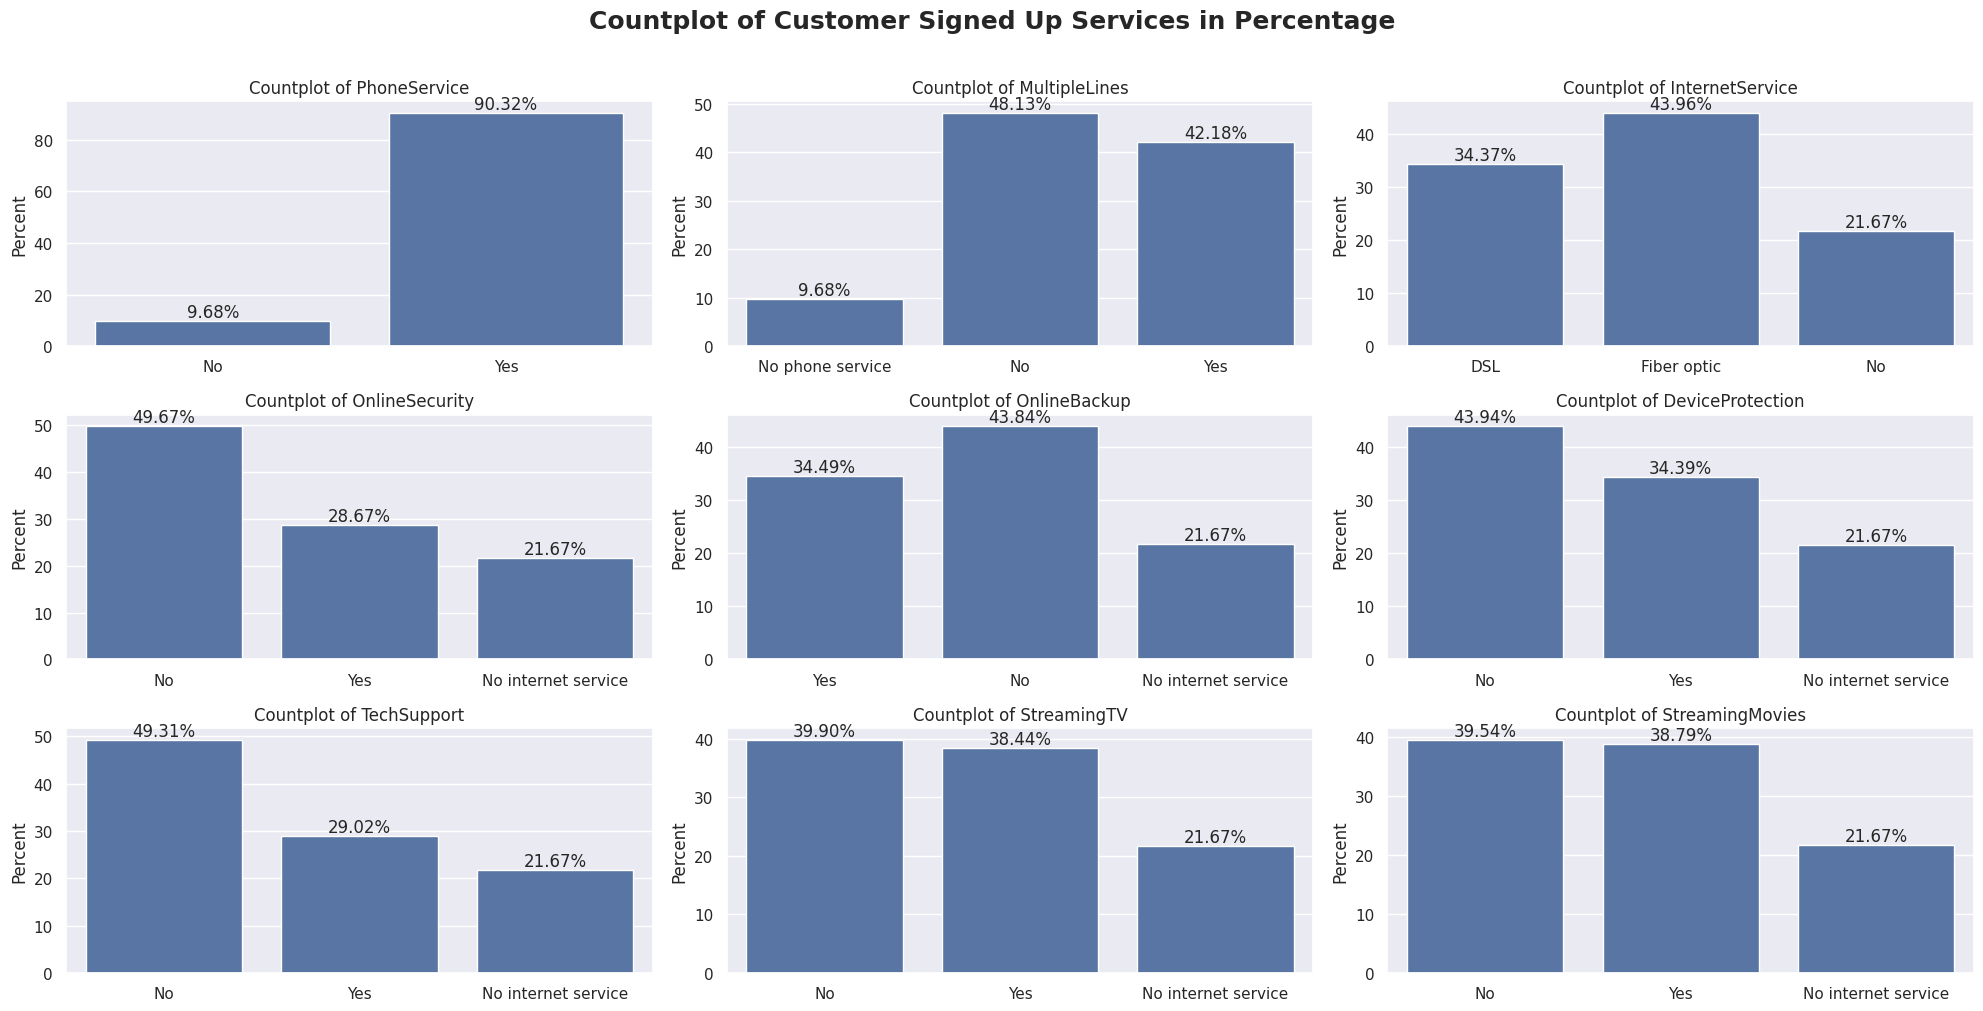

In [ ]:
fig, axes = plt.subplots(
    nrows=3,
    ncols=3,
    figsize=(20,10)
)

axes = axes.flatten()

for i, col in enumerate(services):
    sns.countplot(x=churn_df[col], ax=axes[i], stat='percent')
    axes[i].bar_label(axes[i].containers[0], fmt='%.2f%%')
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Percent')

plt.suptitle('Countplot of Customer Signed Up Services in Percentage', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('countplot of customer signed up services in percentage.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

jenis internet sevices apa yang paing diminati dan berapa persentasenya pada keseluruhan customer?

fiber optic menjadi internet service paling diminati dengan persentase hampir setengah dari keseluruhan customer yaitu sekitar 43.96%

services apa yang paling diminati oleh keseluruhan customer? sebutkan top 3 produk yang paling diminati.

In [ ]:
services_yes = dict()
for value in ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    services_yes[value] = (churn_df[value].value_counts(normalize=True)["Yes"] * 100).round(2)

In [ ]:
services_yes['InternetService'] = (churn_df['InternetService'].value_counts(normalize=True)[:2].sum() * 100).round(2)

In [ ]:
services_user = pd.DataFrame({
    'service':services_yes.keys(),
    'total user (%)':services_yes.values()
})

services_user = services_user.sort_values(by='total user (%)', ascending=False).reset_index(drop=True)
services_user

,service,total user (%)
0,PhoneService,90.32
1,InternetService,78.33
2,MultipleLines,42.18
3,StreamingMovies,38.79
4,StreamingTV,38.44
5,OnlineBackup,34.49
6,DeviceProtection,34.39
7,TechSupport,29.02
8,OnlineSecurity,28.67


In [ ]:
print('top 3 most popular service:')
display(services_user[:3])


top 3 most popular service:


,service,total user (%)
0,PhoneService,90.32
1,InternetService,78.33
2,MultipleLines,42.18


service apa yang paling tidak diminiati?

In [ ]:
services_no = dict()
for value in services:
    services_no[value] = (churn_df[value].value_counts(normalize=True)["No"] * 100).round(2)

In [ ]:
services_user_2 = pd.DataFrame({
    'service':services_no.keys(),
    'total user (%)':services_no.values()
})

services_user_2 = services_user_2.sort_values(by='total user (%)', ascending=False).reset_index(drop=True)

In [ ]:
print('less popular service')
display(services_user_2)

less popular service


,service,total user (%)
0,OnlineSecurity,49.67
1,TechSupport,49.31
2,MultipleLines,48.13
3,DeviceProtection,43.94
4,OnlineBackup,43.84
5,StreamingTV,39.90
6,StreamingMovies,39.54
7,InternetService,21.67
8,PhoneService,9.68


contract apa yang paling diminati customer? dan berapa persentasinya?

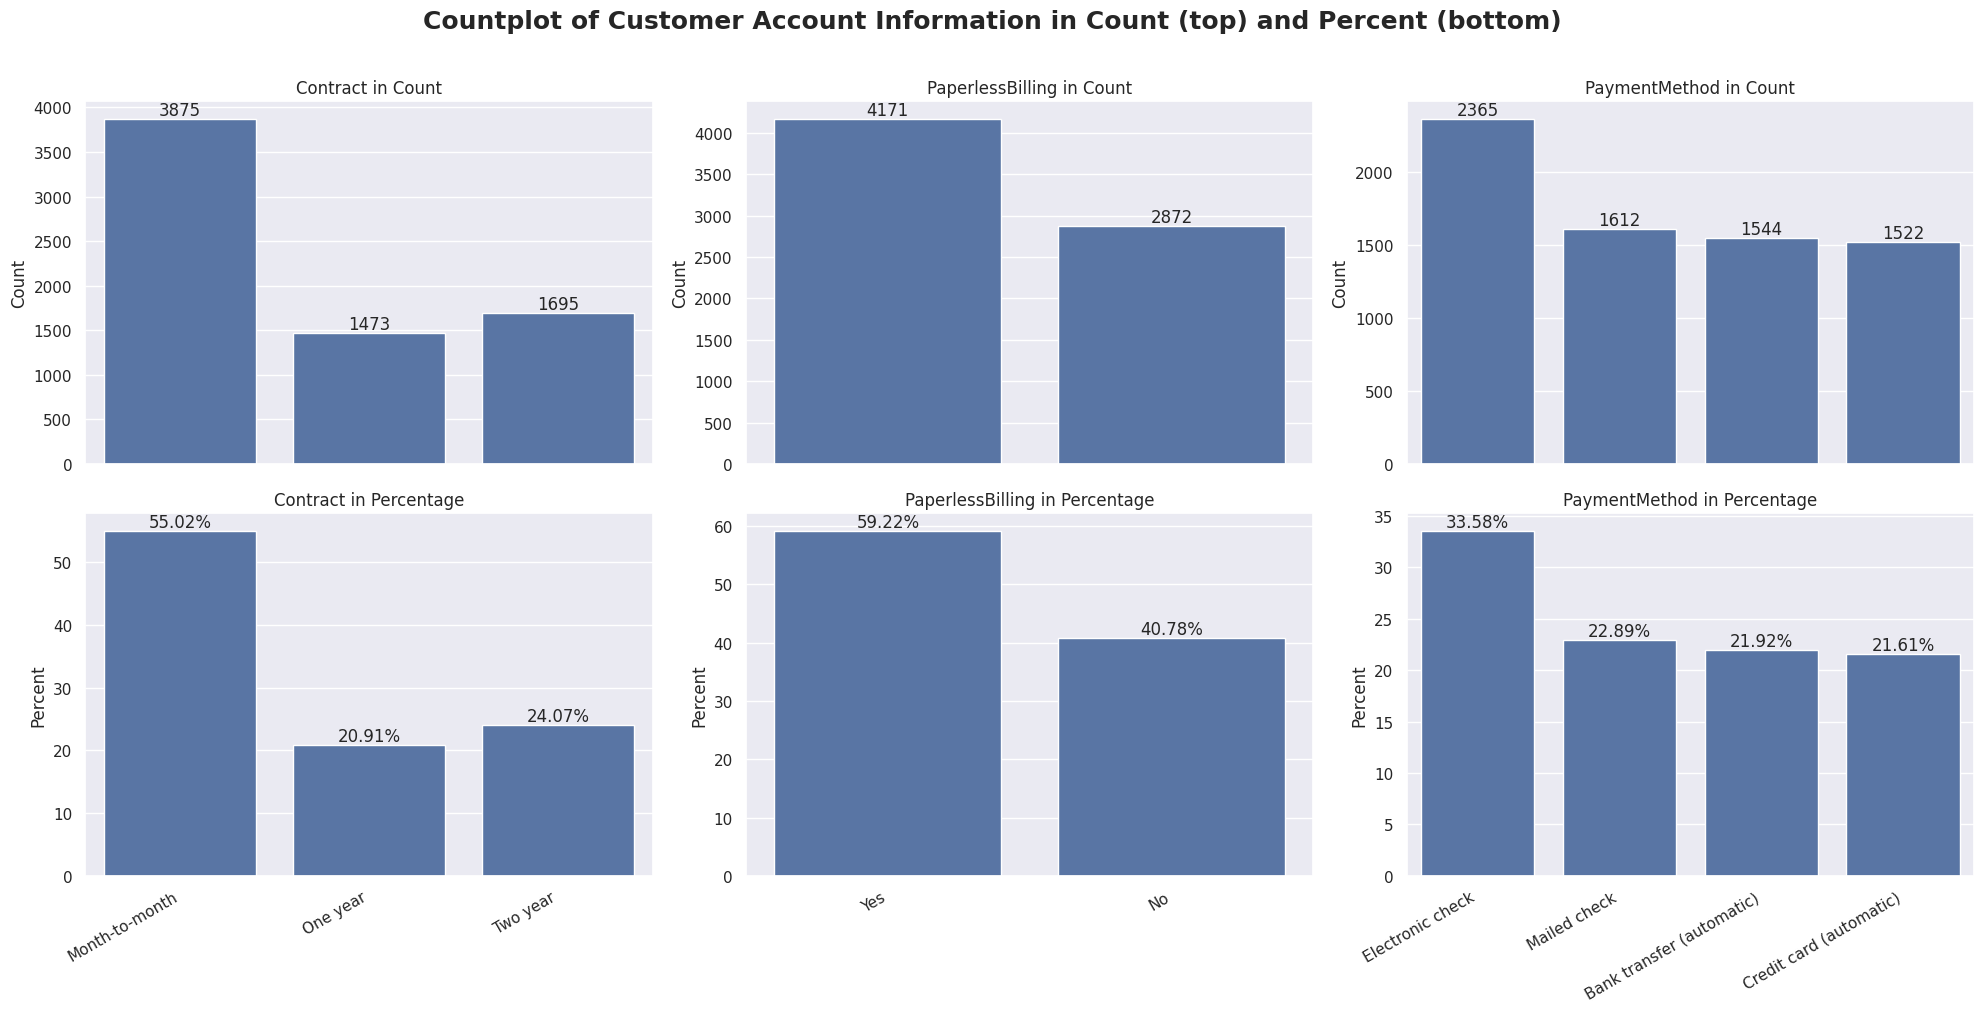

In [ ]:
fig, axes = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(20,10)
)

axes = axes.flatten()

for i, col in enumerate(account_info):
    sns.countplot(x=churn_df[col], ax=axes[i])
    axes[i].bar_label(axes[i].containers[0])
    axes[i].set_title(f'{col} in Count')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    # axes[i].tick_params(axis='x', rotation=-15)

for i, col in enumerate(account_info):
    i = i + 3
    sns.countplot(x=churn_df[col], ax=axes[i], stat='percent')
    axes[i].bar_label(axes[i].containers[0], fmt='%.2f%%')
    axes[i].set_title(f'{col} in Percentage')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Percent')
    # axes[i].tick_params(axis='x', rotation=-15)

fig.autofmt_xdate()
plt.suptitle('Countplot of Customer Account Information in Count (top) and Percent (bottom)', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('countplot of customer account information.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

kontrak bulanan menjadi jenis kontrak yang paling diminati customer dengan persentase sebanyak lebih dari setengah dari keseluruhan customer yaitu sekitar 56.02%

**target variable proportion**

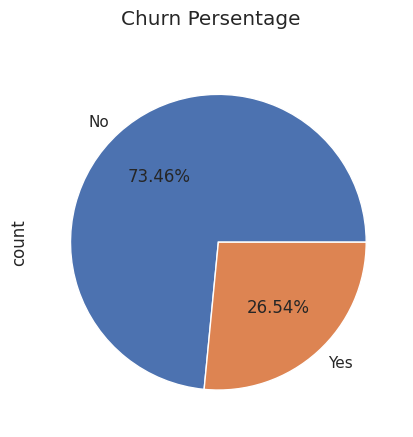

In [ ]:
churn_df['Churn'].value_counts().plot.pie(autopct='%.2f%%')
plt.suptitle('Churn Persentage')
plt.savefig('pie chart of churn.jpg');

### 3.2.2. Exploratory Analysis

#### A. customer demographic information vs churn

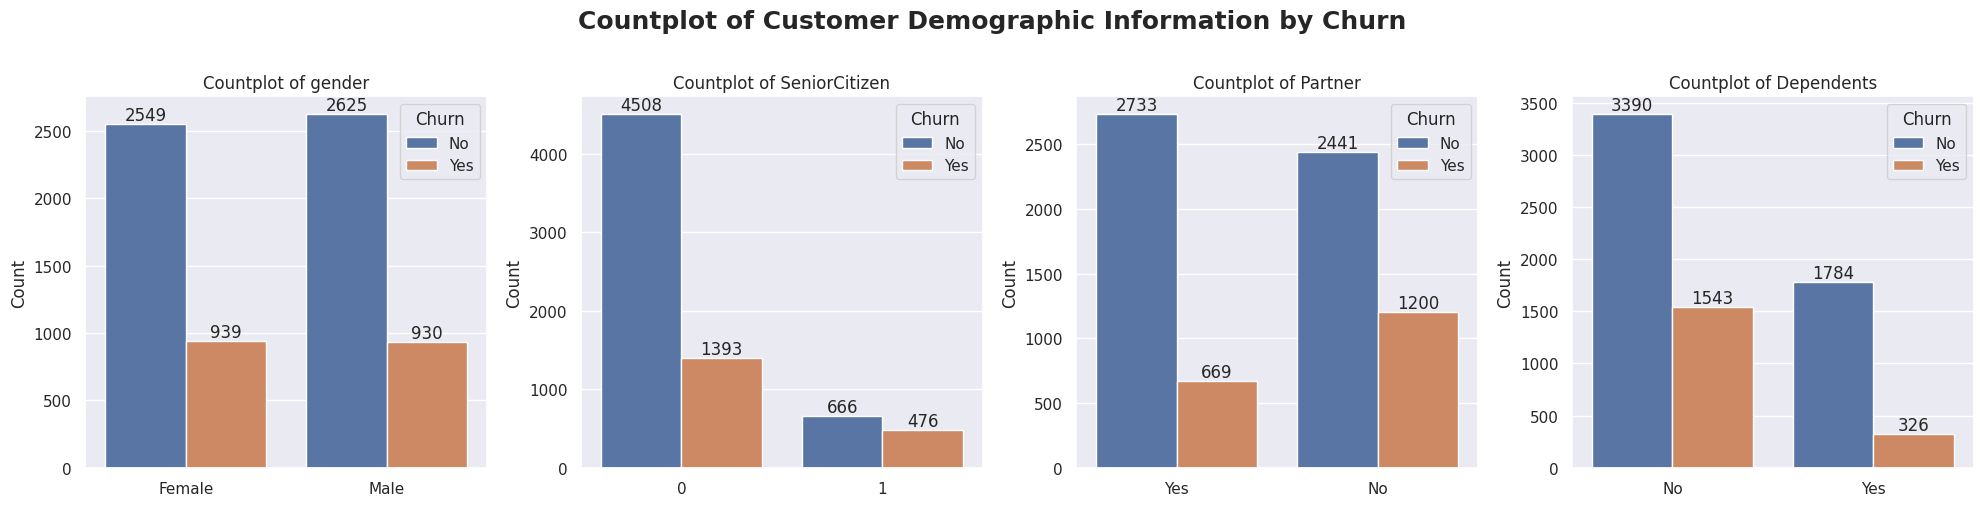

In [ ]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=4,
    figsize=(20,5)
)

axes = axes.flatten()

for i, col in enumerate(customer_info):
    sns.countplot(churn_df, x=col, ax=axes[i], hue='Churn')
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.suptitle('Countplot of Customer Demographic Information by Churn', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('countplot of customer demographic information by churn.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

**partner vs churn**

kita dapatkan bahwa churn pada kelompok pelanggan yang tidak memiliki pasangan cenderung lebih tinggi dibandingkan dengan tingkat churn pada pelanggan yang memiliki pasangan

**Q1**: apakah ada hubungan antara partner dan tingkat churn?

dari hasil visualisasi diatas bisa timbul dugaan bahwa  partner memiliki hubungan yang signifikan terhadap churn

let's do some inferencial analysis based on the hypothesis

*1. Hipotesis*

H0 : tidak ada hubungan yang signifikan antara pelanggan yang sudah memiliki pasangan atau pelanggan yang belum memiliki pasangan terhadap churn

HA : ada hubungan yang signifikan antara pelanggan yang sudah memiliki pasangan atau pelanggan yang belum memiliki pasangan terhadap churn

*2. significance value alpha = 0.05*

*3. statistic test*

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

def chi_square_test(a:pd.Series, b:pd.Series, alpha:float):
    crosstab_df = pd.crosstab(a, b, margins=True, margins_name='Total')
    print('contingency table:')
    print(crosstab_df)

    chi, p, dof, expected = chi2_contingency(crosstab_df)
    result = pd.DataFrame({
        'variable':['chi-square', 'p-value', 'dof'],
        'value':[chi, p, dof]
    })

    print('result:')
    print(result)

    print('kriteria penolakan:')
    if p < alpha:
        print('H0 ditolak')
    else:
        print('H0 tidak ditolak')


In [ ]:
chi_square_test(churn_df['Partner'], churn_df['Churn'], alpha=0.05)

contingency table:
Churn      No   Yes  Total
Partner                   
No       2441  1200   3641
Yes      2733   669   3402
Total    5174  1869   7043
result:
     variable         value
0  chi-square  1.594145e+02
1     p-value  1.952035e-33
2         dof  4.000000e+00
kriteria penolakan:
H0 ditolak


*4. conclution*

karena p-value = 1.95e-33 < 0.05 maka H0 ditolak. dapat disimpulkan bahwa ada hubungan yang signifikan antara pelanggan yang sudah memiliki pasangan atau pelanggan yang belum memiliki pasangan terhadap churn

---

**dependents vs churn**

dari hasil visulisasi kita dapatkan bahwa jumlah customer yang churn pada customer yang memilik tanggungan dengan customer yang tidak memiliki tanggungan sangat berpaut jauh.

Q2: apakah terdapat hubungan yang signifikan antara dependents (tanggungan) customer terhadap tingkat churn?

dari hasil visualisasi terlihat perbedaan jumlah yang cukup besar antara pelanggan yang churn dengan tanggungan.mari kita buat hipotesis

*1. hypothsis*

H0 : tidak ada hubungan yang signifikan antara tanggungan dengan churn

HA : ada hubungan yang signifikan antara tanggungan dengan churn

*2. significance value alpha = 0.05*

*3. statistic test*

In [ ]:
chi_square_test(churn_df['Dependents'], churn_df['Churn'], alpha=0.05)

contingency table:
Churn         No   Yes  Total
Dependents                   
No          3390  1543   4933
Yes         1784   326   2110
Total       5174  1869   7043
result:
     variable         value
0  chi-square  1.899403e+02
1     p-value  5.459047e-40
2         dof  4.000000e+00
kriteria penolakan:
H0 ditolak


*4. conclusion*

dari hasil tersebut didapatkan bahwa H0 ditolak, maka ada hubungan yang signifikan antara tanggungan pelanggan dengan churn

---

**senior citizen vs churn**

In [ ]:
chi_square_test(churn_df['SeniorCitizen'], churn_df['Churn'], alpha=0.05)

contingency table:
Churn            No   Yes  Total
SeniorCitizen                   
0              4508  1393   5901
1               666   476   1142
Total          5174  1869   7043
result:
     variable         value
0  chi-square  1.603521e+02
1     p-value  1.228584e-33
2         dof  4.000000e+00
kriteria penolakan:
H0 ditolak


ada hubungan yang signifikan antara senior citizen dengan churn

---

**gender vs churn**

In [ ]:
chi_square_test(churn_df['gender'], churn_df['Churn'], alpha=0.05)

contingency table:
Churn     No   Yes  Total
gender                   
Female  2549   939   3488
Male    2625   930   3555
Total   5174  1869   7043
result:
     variable     value
0  chi-square  0.522367
1     p-value  0.971287
2         dof  4.000000
kriteria penolakan:
H0 tidak ditolak


tidak ada hubungan yang signifikan antara gender dengan churn. hal ini mungkin disebabkan karena proporsi gender laki-laki dan perempuan sama pada data yang churn dan tidak churn

#### B. services vs churn

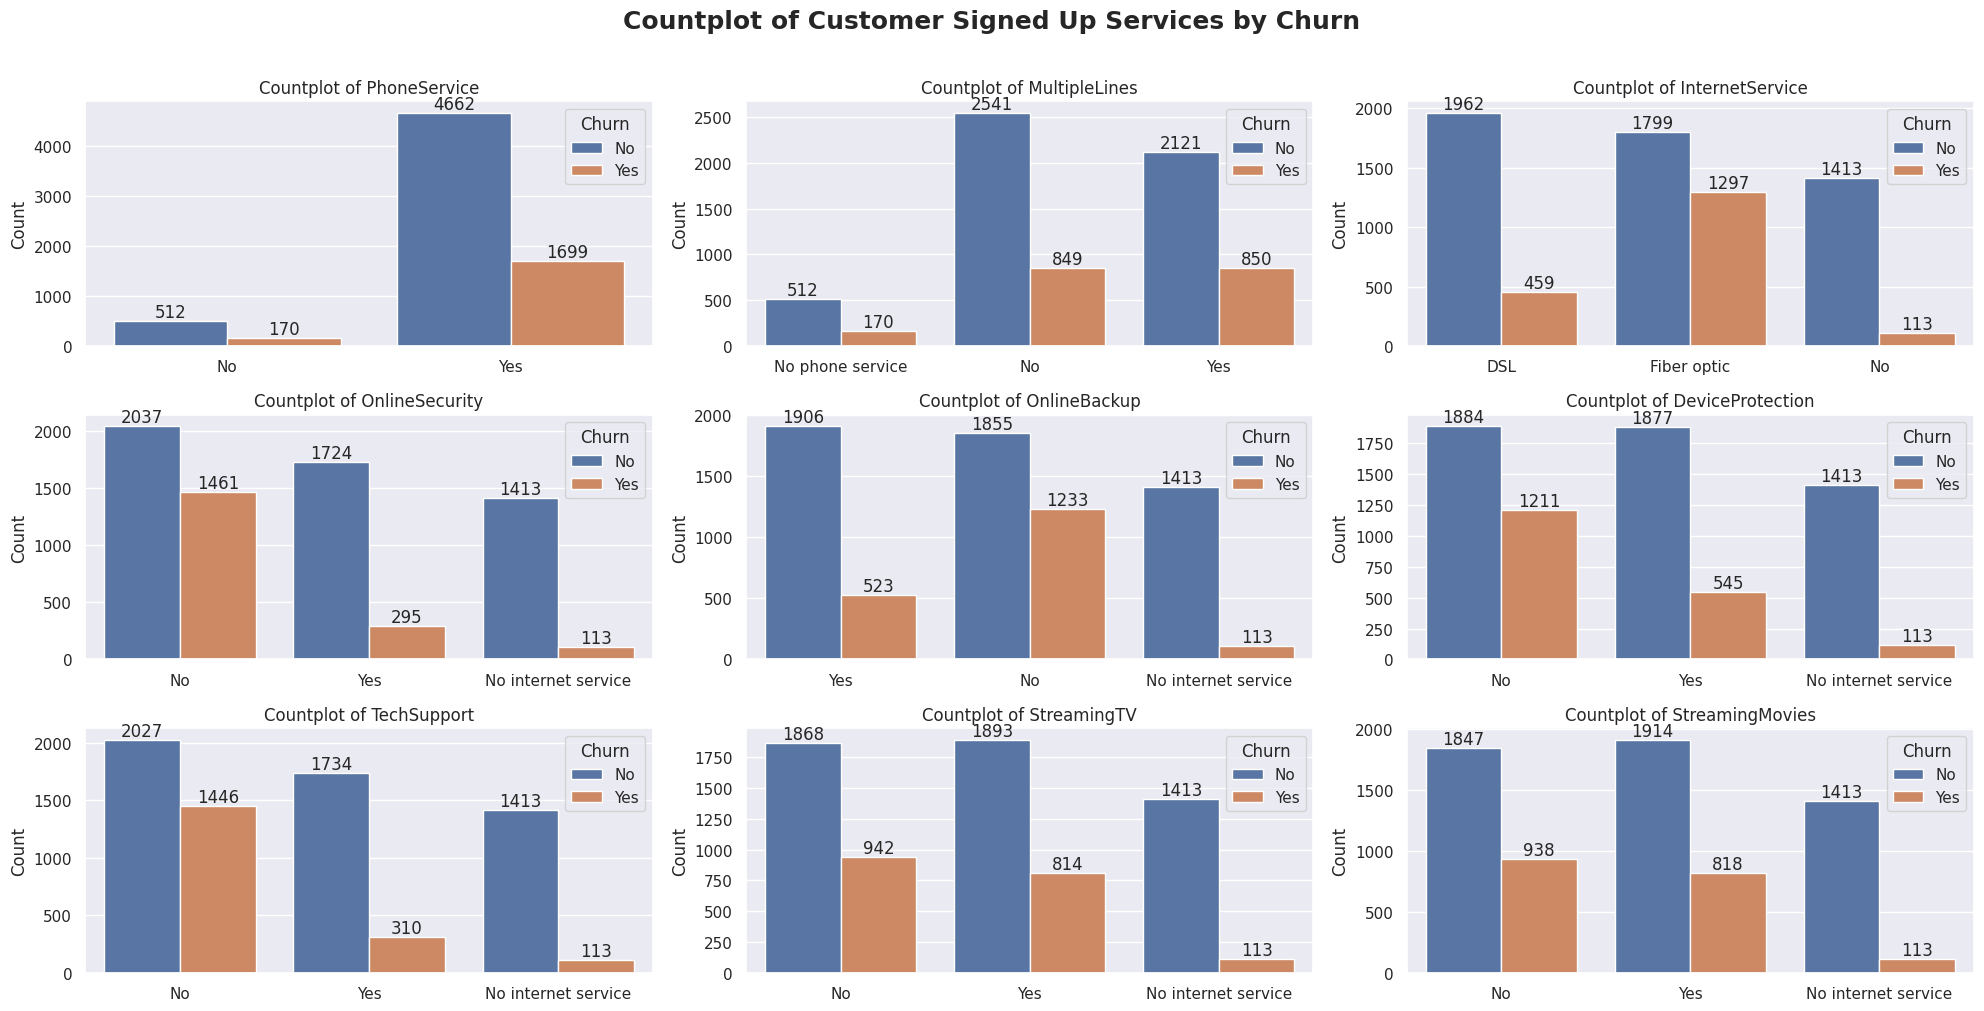

In [ ]:
fig, axes = plt.subplots(
    nrows=3,
    ncols=3,
    figsize=(20,10)
)

axes = axes.flatten()

for i, col in enumerate(services):
    sns.countplot(churn_df, x=col, ax=axes[i], hue='Churn')
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.suptitle('Countplot of Customer Signed Up Services by Churn', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('countplot of customer signed up services by churn.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

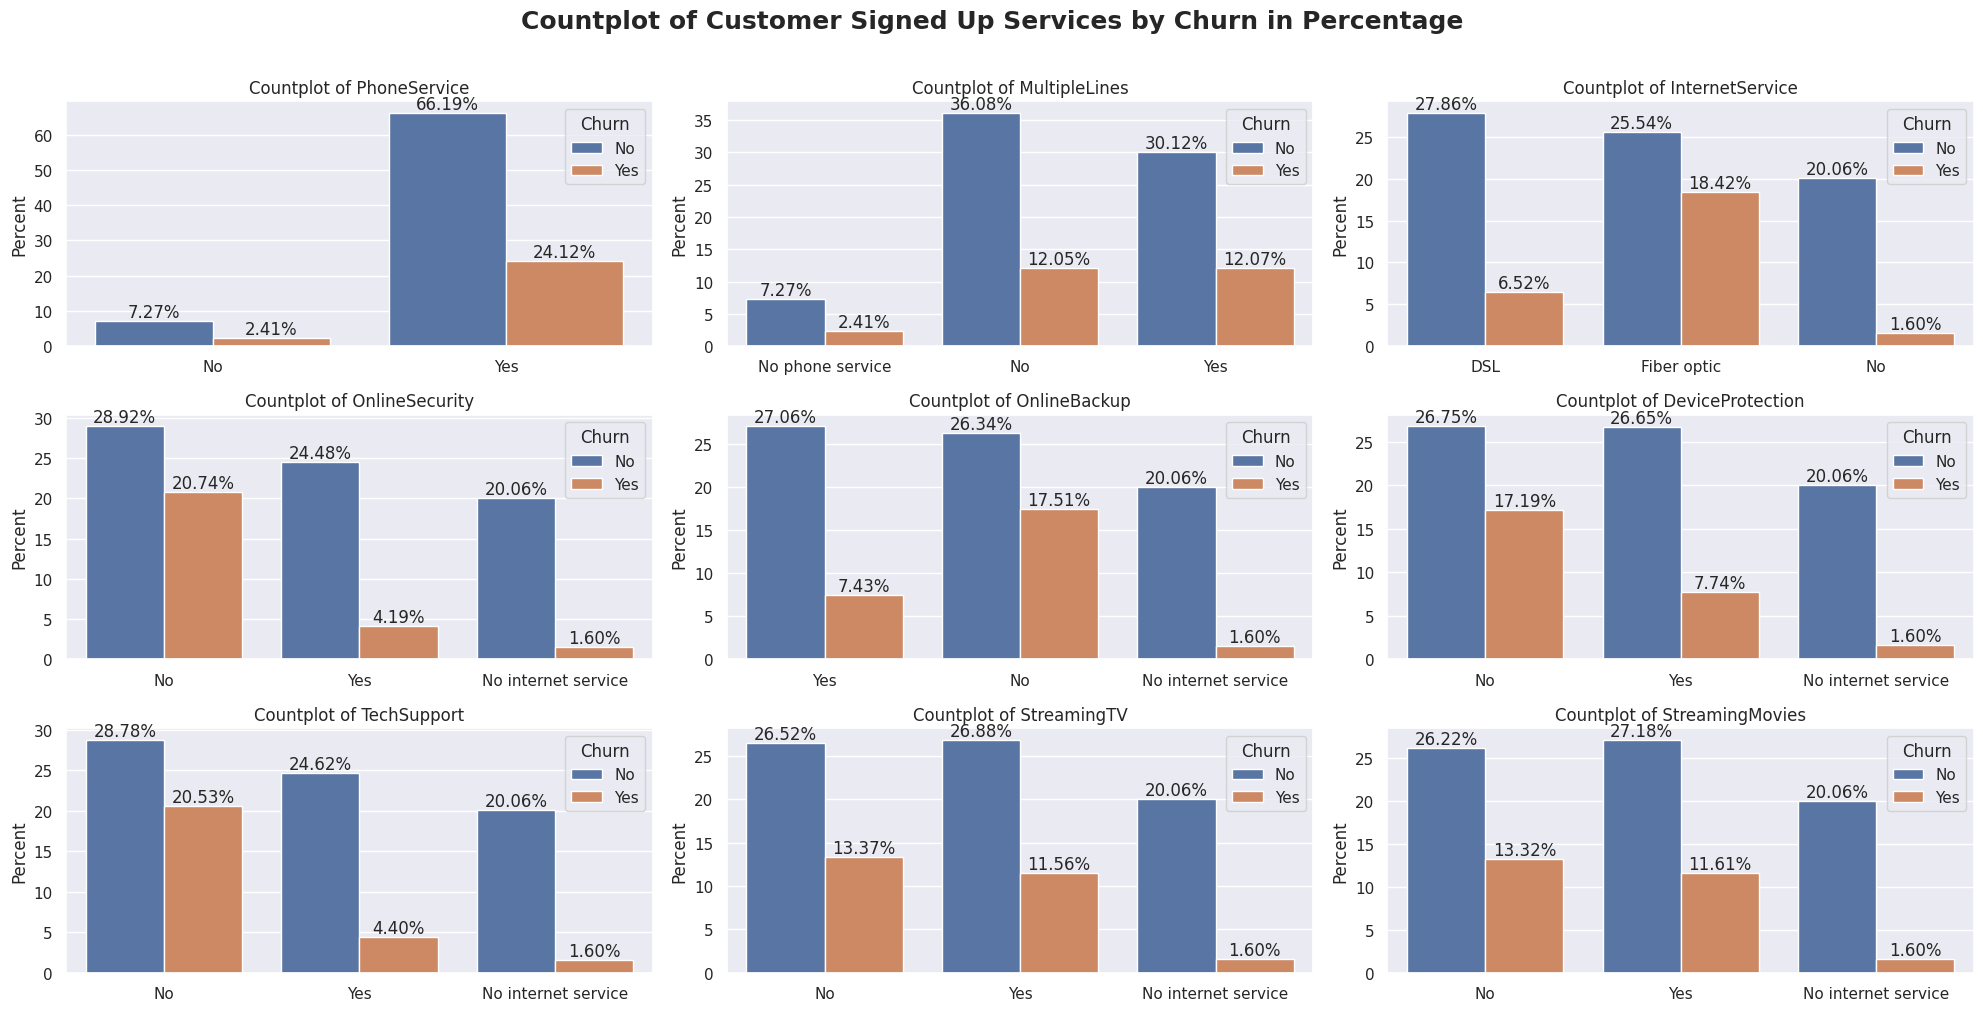

In [ ]:
fig, axes = plt.subplots(
    nrows=3,
    ncols=3,
    figsize=(20,10)
)

axes = axes.flatten()

for i, col in enumerate(services):
    sns.countplot(churn_df, x=col, ax=axes[i], hue='Churn', stat='percent')
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.2f%%')
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Percent')

plt.suptitle('Countplot of Customer Signed Up Services by Churn in Percentage', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('countplot of customer signed up services by churn in percentage.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

apakah ada hubungan antara banyaknya pilihan layanan dengan tingkat churn?

In [ ]:
churn_df['total_services'] = churn_df[services].apply(lambda row: ((row == 'Yes') | (row == 'DSL') | (row == 'Fiber optic')).sum(), axis=1)

In [ ]:
churn_df['total_services']

,total_services
0,2
1,4
2,4
3,4
4,2
...,...
7038,8
7039,7
7040,2
7041,3


In [ ]:
churn_df[services].head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,No phone service,DSL,No,Yes,No,No,No,No
1,Yes,No,DSL,Yes,No,Yes,No,No,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,Yes,No,Fiber optic,No,No,No,No,No,No


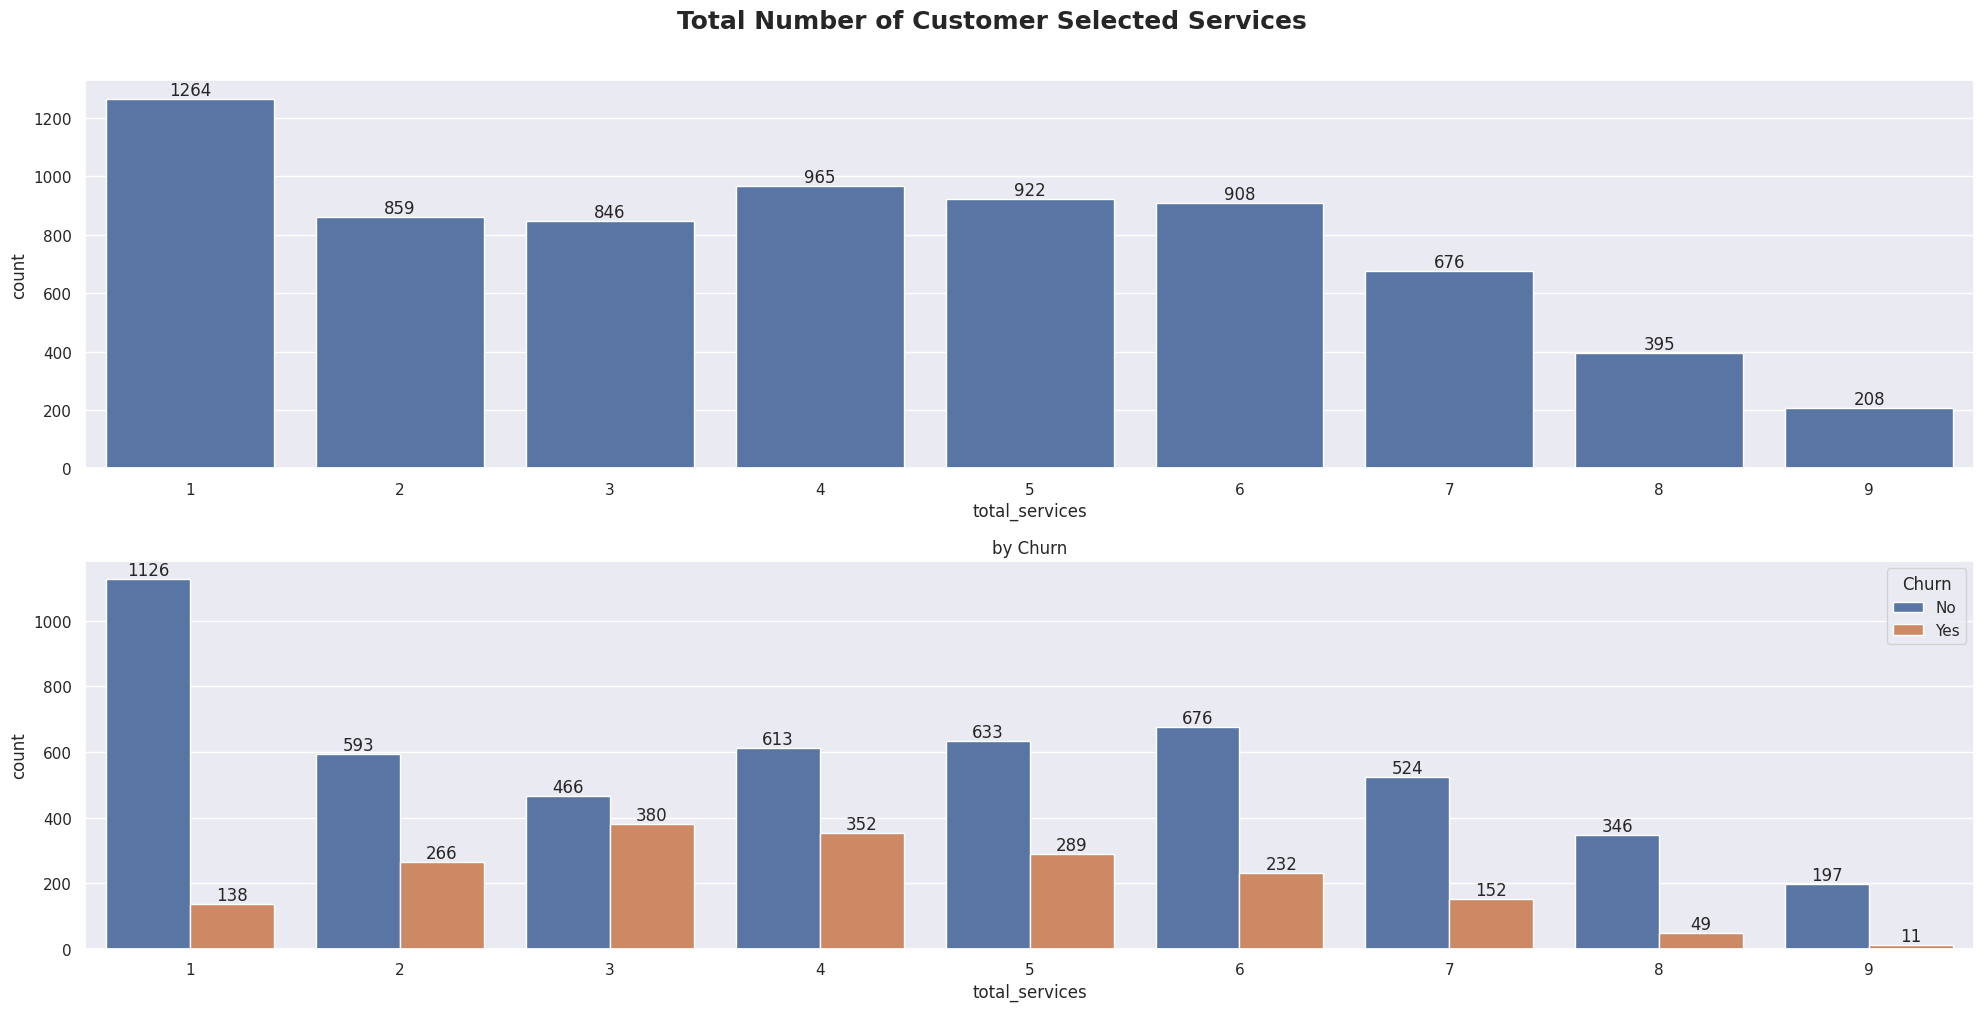

In [ ]:
fig, axes = plt.subplots(
    nrows=2,
    figsize=(20,10)
)

axes = axes.flatten()

sns.countplot(churn_df, x='total_services', ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)

sns.countplot(churn_df, x='total_services', hue='Churn', ax=axes[1])
for container in axes[1].containers:
    axes[1].bar_label(container)
axes[1].set_title('by Churn')

plt.suptitle('Total Number of Customer Selected Services', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('total number of customer selected services.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

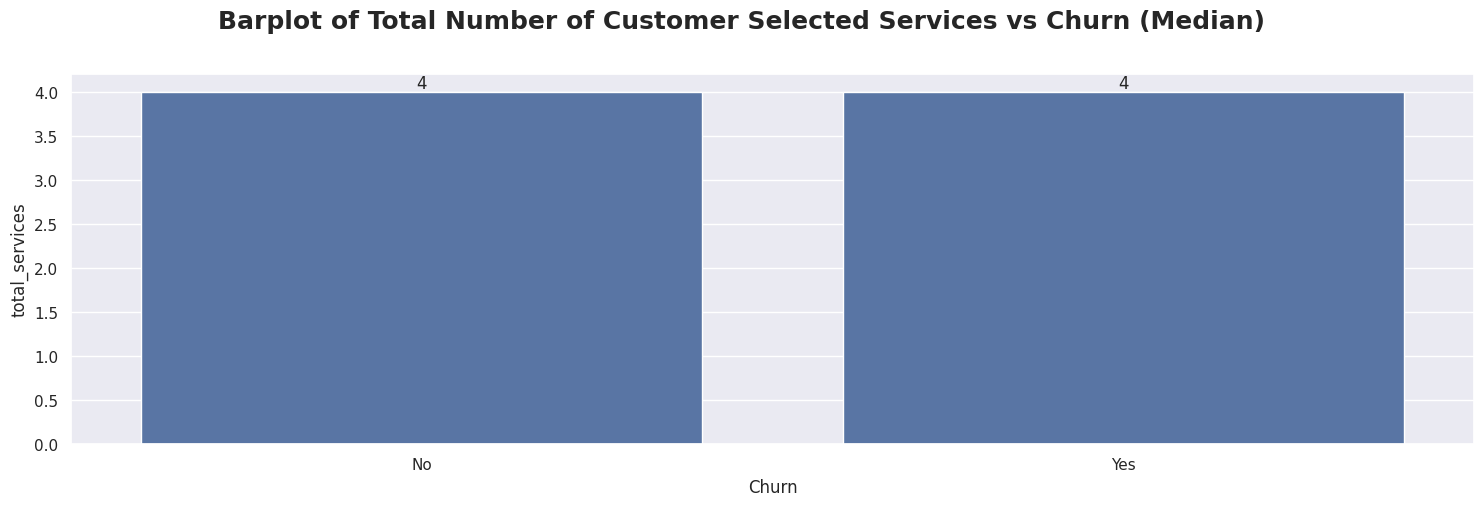

In [ ]:
fig, ax = plt.subplots(
    figsize=(15,5)
)

sns.barplot(churn_df, x='Churn', y='total_services', errorbar=None, estimator='median', ax=ax)
ax.bar_label(ax.containers[0])

plt.suptitle('Barplot of Total Number of Customer Selected Services vs Churn (Median)', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('total Number of tustomer selected services vs churn.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

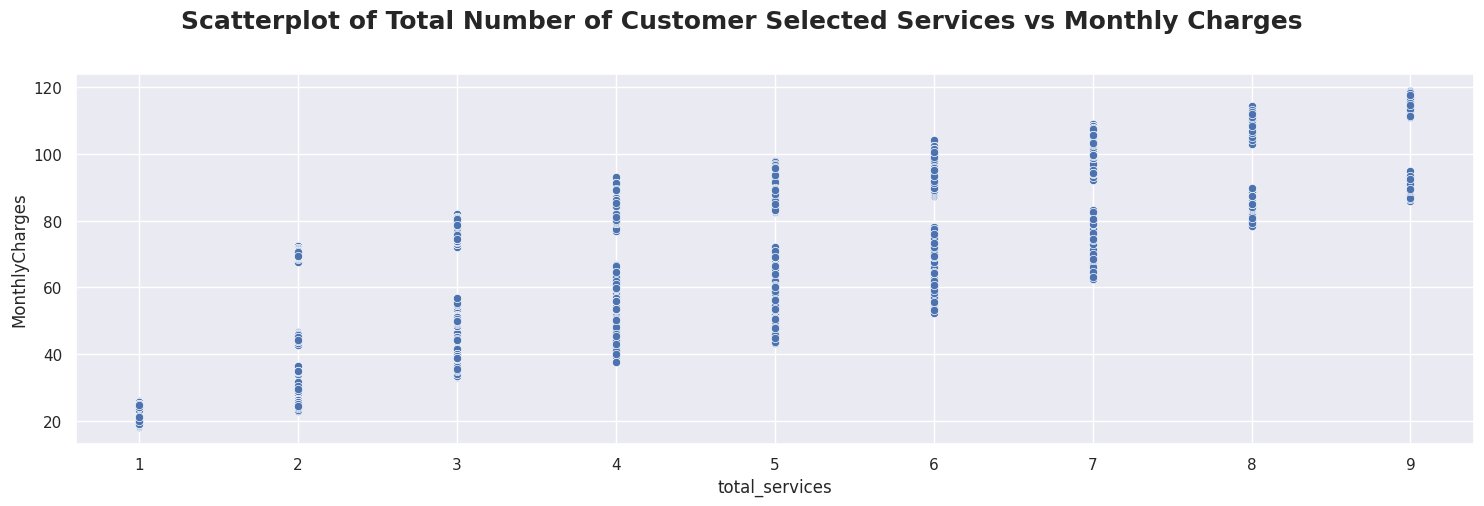

In [ ]:
fig, ax = plt.subplots(
    figsize=(15,5)
)

sns.scatterplot(churn_df, x='total_services', y='MonthlyCharges', ax=ax)

plt.suptitle('Scatterplot of Total Number of Customer Selected Services vs Monthly Charges', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('total number of selected service vs monthly charges.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()


In [ ]:
churn_df[['total_services', 'MonthlyCharges']].corr()

,total_services,MonthlyCharges
total_services,1.00000,0.85138
MonthlyCharges,0.85138,1.00000


terdapat korelasi positif kuat. semakin besar pilihan services customer maka semakin besar pula tagihan bulanannya.

kami rasa features baru total_services tidak terlalu memberikan dampak karena tidak ada perbedaan rata-rata dan median yang signifikan pada tingkat churn

In [ ]:
churn_df.drop('total_services', axis=1, inplace=True)

---

**phone service vs churn**

apakah feature phone service memiliki hubungan dengan churn?

dilihat dari hasil visualisasi feature phone service dominan pada nilai Yes dengan presentase lebih dari 90%. features yang didominasi oleh satu nilai biasanya tidak terlalu berguna untuk memprediksi target. mari kita coba cek hubungannya dengan churn menggunakan fungsi chi square test.

In [ ]:
chi_square_test(churn_df['PhoneService'], churn_df['Churn'], alpha=0.05)

contingency table:
Churn           No   Yes  Total
PhoneService                   
No             512   170    682
Yes           4662  1699   6361
Total         5174  1869   7043
result:
     variable     value
0  chi-square  1.004408
1     p-value  0.909127
2         dof  4.000000
kriteria penolakan:
H0 tidak ditolak


gagal menolak H0 dapat disimpulkan bahwa tidak terdapat hubungan yang signifikan anatara phone service dengan churn

---

**Internet Services vs Churn**

In [ ]:
churn_df.query('Churn == "Yes"').groupby('InternetService')['MonthlyCharges'].mean()

,MonthlyCharges
InternetService,
DSL,49.083224
Fiber optic,88.126484
No,20.368142


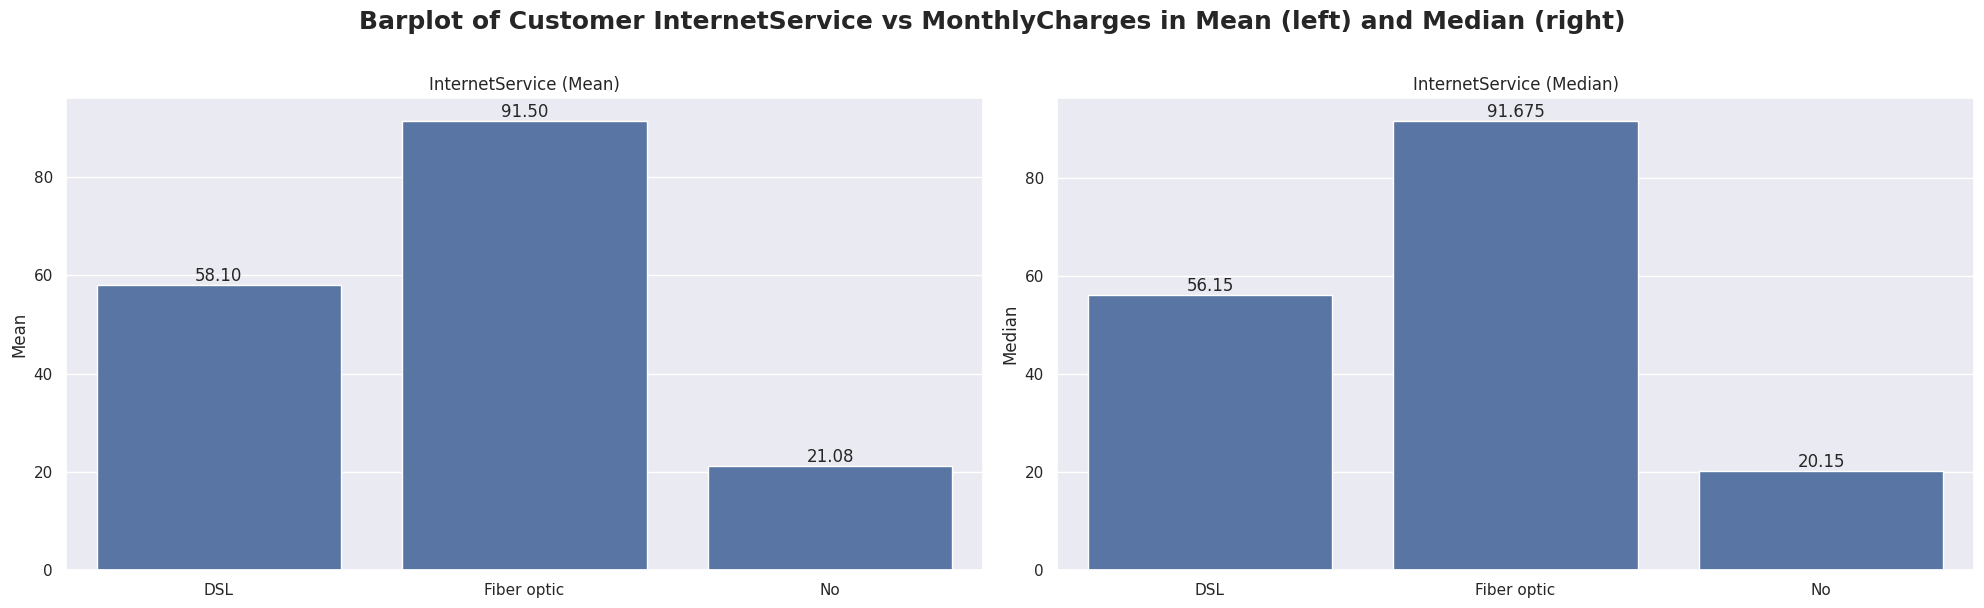

In [ ]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(20,6)
)

axes = axes.flatten()

sns.barplot(churn_df, x='InternetService', y='MonthlyCharges', ax=axes[0], errorbar=None, estimator='mean')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f')
axes[0].set_title(f'InternetService (Mean)')
axes[0].set_xlabel('')
axes[0].set_ylabel('Mean')


sns.barplot(churn_df, x='InternetService', y='MonthlyCharges', ax=axes[1], errorbar=None, estimator='median')
for container in axes[1].containers:
    axes[1].bar_label(container)
axes[1].set_title(f'InternetService (Median)')
axes[1].set_xlabel('')
axes[1].set_ylabel('Median')

plt.suptitle('Barplot of Customer InternetService vs MonthlyCharges in Mean (left) and Median (right)', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('barplot of customer internet service vs monthly charges.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

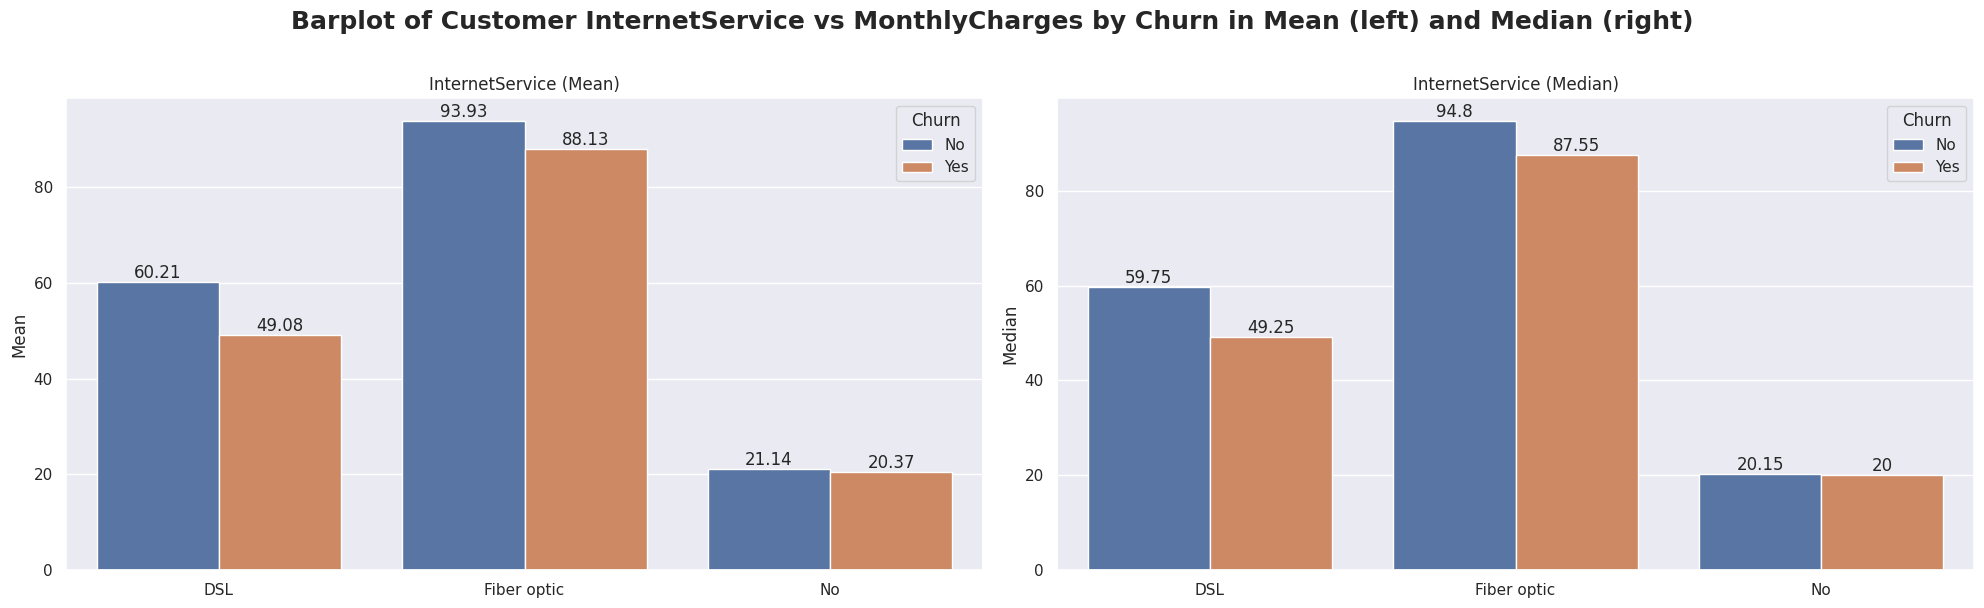

In [ ]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(20,6)
)

axes = axes.flatten()

sns.barplot(churn_df, x='InternetService', y='MonthlyCharges', ax=axes[0], hue='Churn', errorbar=None, estimator='mean')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f')
axes[0].set_title(f'InternetService (Mean)')
axes[0].set_xlabel('')
axes[0].set_ylabel('Mean')


sns.barplot(churn_df, x='InternetService', y='MonthlyCharges', ax=axes[1], hue='Churn', errorbar=None, estimator='median')
for container in axes[1].containers:
    axes[1].bar_label(container)
axes[1].set_title(f'InternetService (Median)')
axes[1].set_xlabel('')
axes[1].set_ylabel('Median')

plt.suptitle('Barplot of Customer InternetService vs MonthlyCharges by Churn in Mean (left) and Median (right)', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('barplot of customer internet service vs monthly charges by churn.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

Insight:
- Fiber Optic memiliki biaya bulanan yang lebih tinggi secara keseluruhan. Pelanggan layanan fiber optic lebih cenderung churn dibandingkan pelanggan DSL.

- DSL memiliki tren di mana pelanggan yang churn membayar lebih rendah dibandingkan yang tidak churn.

- No Service memiliki biaya bulanan yang sangat rendah dengan sedikit perbedaan antara pelanggan churn dan tidak churn.

Hal ini menunjukkan bahwa semakin tinggi biaya bulanan (terutama pada layanan fiber optic), pelanggan lebih cenderung untuk churn, meskipun ada faktor lain yang mungkin mempengaruhi keputusan churn.

---

**Online Security vs Churn**

In [ ]:
churn_df.query('Churn == "Yes"').groupby('OnlineSecurity')['MonthlyCharges'].mean()

,MonthlyCharges
OnlineSecurity,
No,77.181896
No internet service,20.368142
Yes,81.581356


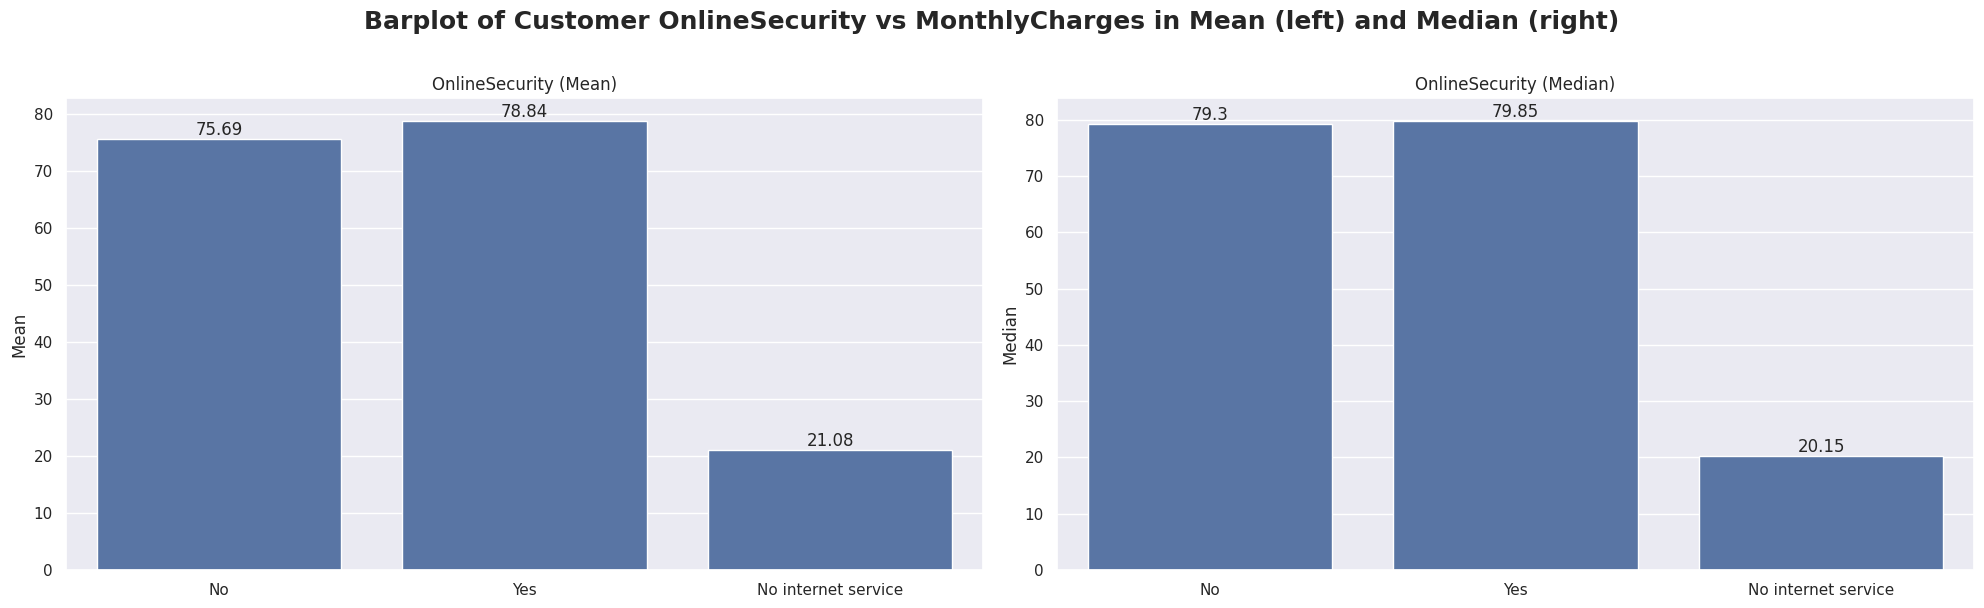

In [ ]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(20,6)
)

axes = axes.flatten()

sns.barplot(churn_df, x='OnlineSecurity', y='MonthlyCharges', ax=axes[0], errorbar=None, estimator='mean')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f')
axes[0].set_title(f'OnlineSecurity (Mean)')
axes[0].set_xlabel('')
axes[0].set_ylabel('Mean')


sns.barplot(churn_df, x='OnlineSecurity', y='MonthlyCharges', ax=axes[1], errorbar=None, estimator='median')
for container in axes[1].containers:
    axes[1].bar_label(container)
axes[1].set_title(f'OnlineSecurity (Median)')
axes[1].set_xlabel('')
axes[1].set_ylabel('Median')

plt.suptitle('Barplot of Customer OnlineSecurity vs MonthlyCharges in Mean (left) and Median (right)', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('barplot of customer online security vs monthly charges.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

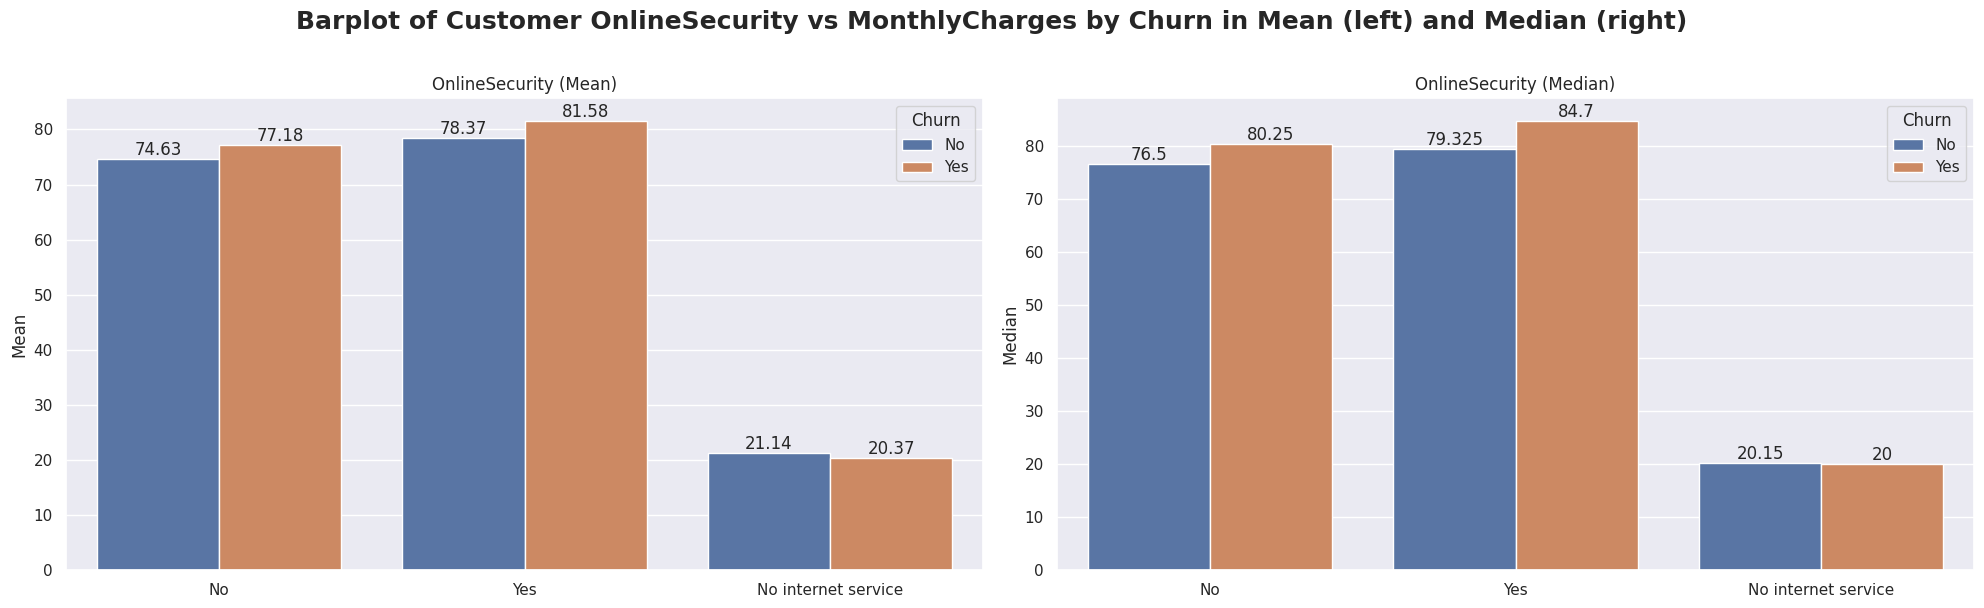

In [ ]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(20,6)
)

axes = axes.flatten()

sns.barplot(churn_df, x='OnlineSecurity', y='MonthlyCharges', ax=axes[0], hue='Churn', errorbar=None, estimator='mean')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f')
axes[0].set_title(f'OnlineSecurity (Mean)')
axes[0].set_xlabel('')
axes[0].set_ylabel('Mean')


sns.barplot(churn_df, x='OnlineSecurity', y='MonthlyCharges', ax=axes[1], hue='Churn', errorbar=None, estimator='median')
for container in axes[1].containers:
    axes[1].bar_label(container)
axes[1].set_title(f'OnlineSecurity (Median)')
axes[1].set_xlabel('')
axes[1].set_ylabel('Median')

plt.suptitle('Barplot of Customer OnlineSecurity vs MonthlyCharges by Churn in Mean (left) and Median (right)', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('barplot of customer online security vs monthly charges by churn.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

Insight:

OnlineSecurity: No Service
- Rata-rata biaya bulanan sedikit lebih tinggi untuk pelanggan yang churn (77,18) dibandingkan yang tidak churn (74,63).
- Median biaya bulanan juga lebih tinggi untuk pelanggan yang churn (80,25) dibandingkan dengan yang tidak churn (76,5).
- Insight: Pelanggan yang tidak menggunakan layanan keamanan online namun memiliki biaya bulanan yang sedikit lebih tinggi cenderung lebih rentan terhadap churn.

OnlineSecurity: Yes Service
- Pelanggan dengan layanan keamanan online memiliki rata-rata dan median biaya yang lebih tinggi bagi pelanggan churn (81,58 rata-rata, 84,7 median) dibandingkan yang tidak churn (78,37 rata-rata, 79,325 median).
- Insight: Meski pelanggan yang memiliki layanan keamanan online membayar lebih, mereka tetap memiliki kecenderungan churn yang signifikan, menunjukkan bahwa layanan keamanan online saja tidak cukup untuk mengurangi churn.

No Internet Service
- Baik rata-rata maupun median biaya bulanan sangat rendah dan hampir sama untuk pelanggan churn dan yang tidak churn, masing-masing sekitar 20-21.
- Insight: Pelanggan tanpa layanan internet memiliki biaya bulanan yang sangat rendah, dan perbedaan churn hampir tidak terlihat, menunjukkan bahwa faktor biaya tidak berpengaruh besar dalam keputusan churn mereka.

Kesimpulan Umum:
Biaya bulanan yang lebih tinggi, baik dengan atau tanpa layanan keamanan online, tampaknya tidak secara signifikan mengurangi risiko churn. Terlepas dari layanan keamanan yang mereka pilih, pelanggan dengan biaya bulanan lebih tinggi tetap cenderung churn, mengindikasikan bahwa faktor lain mungkin lebih penting dalam memengaruhi keputusan mereka.

---

**Online Backup vs Churn**

In [ ]:
churn_df.query('Churn == "Yes"').groupby('OnlineBackup')['MonthlyCharges'].mean()

,MonthlyCharges
OnlineBackup,
No,74.512449
No internet service,20.368142
Yes,85.956788


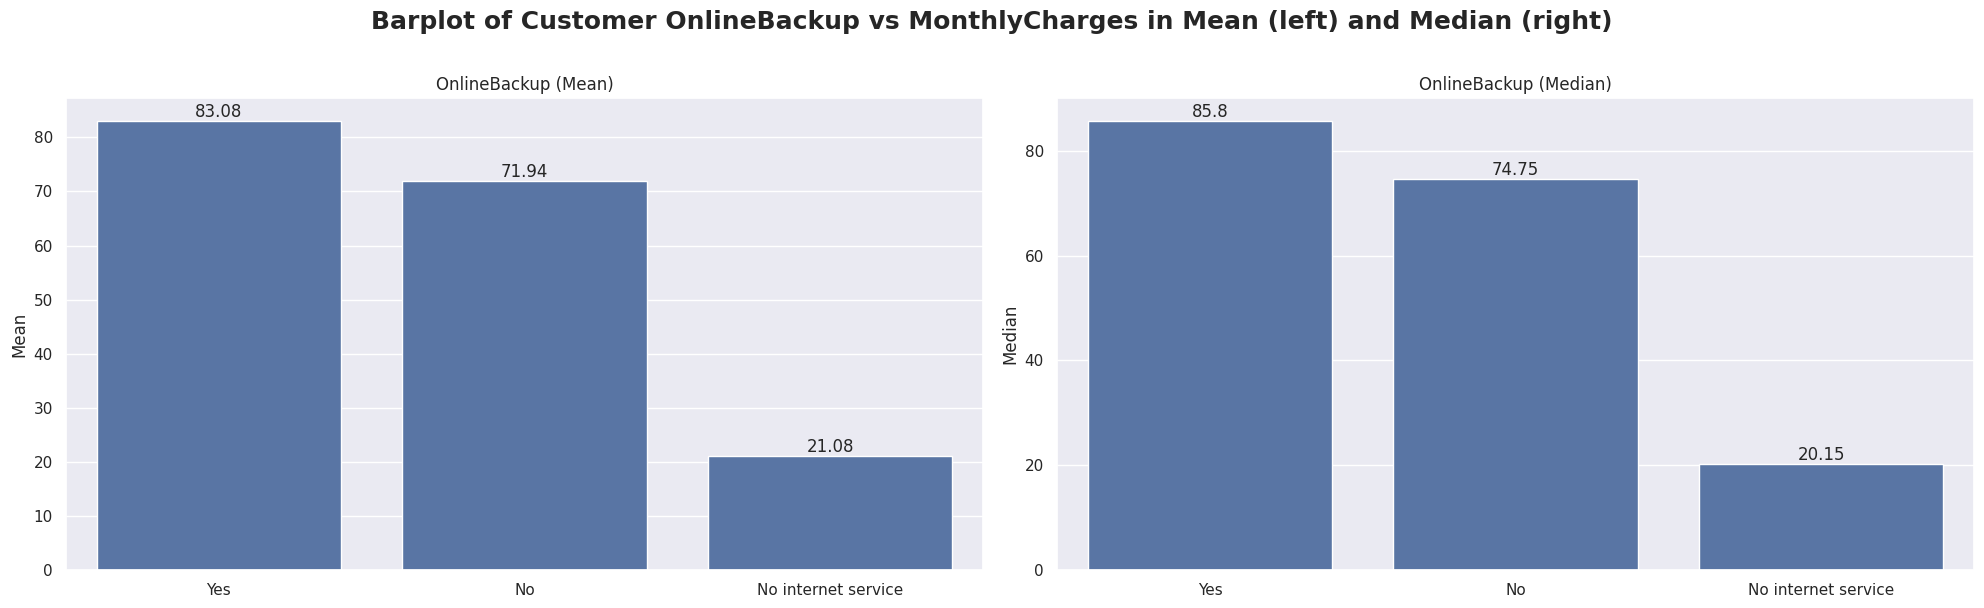

In [ ]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(20,6)
)

axes = axes.flatten()

sns.barplot(churn_df, x='OnlineBackup', y='MonthlyCharges', ax=axes[0], errorbar=None, estimator='mean')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f')
axes[0].set_title(f'OnlineBackup (Mean)')
axes[0].set_xlabel('')
axes[0].set_ylabel('Mean')


sns.barplot(churn_df, x='OnlineBackup', y='MonthlyCharges', ax=axes[1], errorbar=None, estimator='median')
for container in axes[1].containers:
    axes[1].bar_label(container)
axes[1].set_title(f'OnlineBackup (Median)')
axes[1].set_xlabel('')
axes[1].set_ylabel('Median')

plt.suptitle('Barplot of Customer OnlineBackup vs MonthlyCharges in Mean (left) and Median (right)', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('barplot of customer online backup vs monthly charges.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

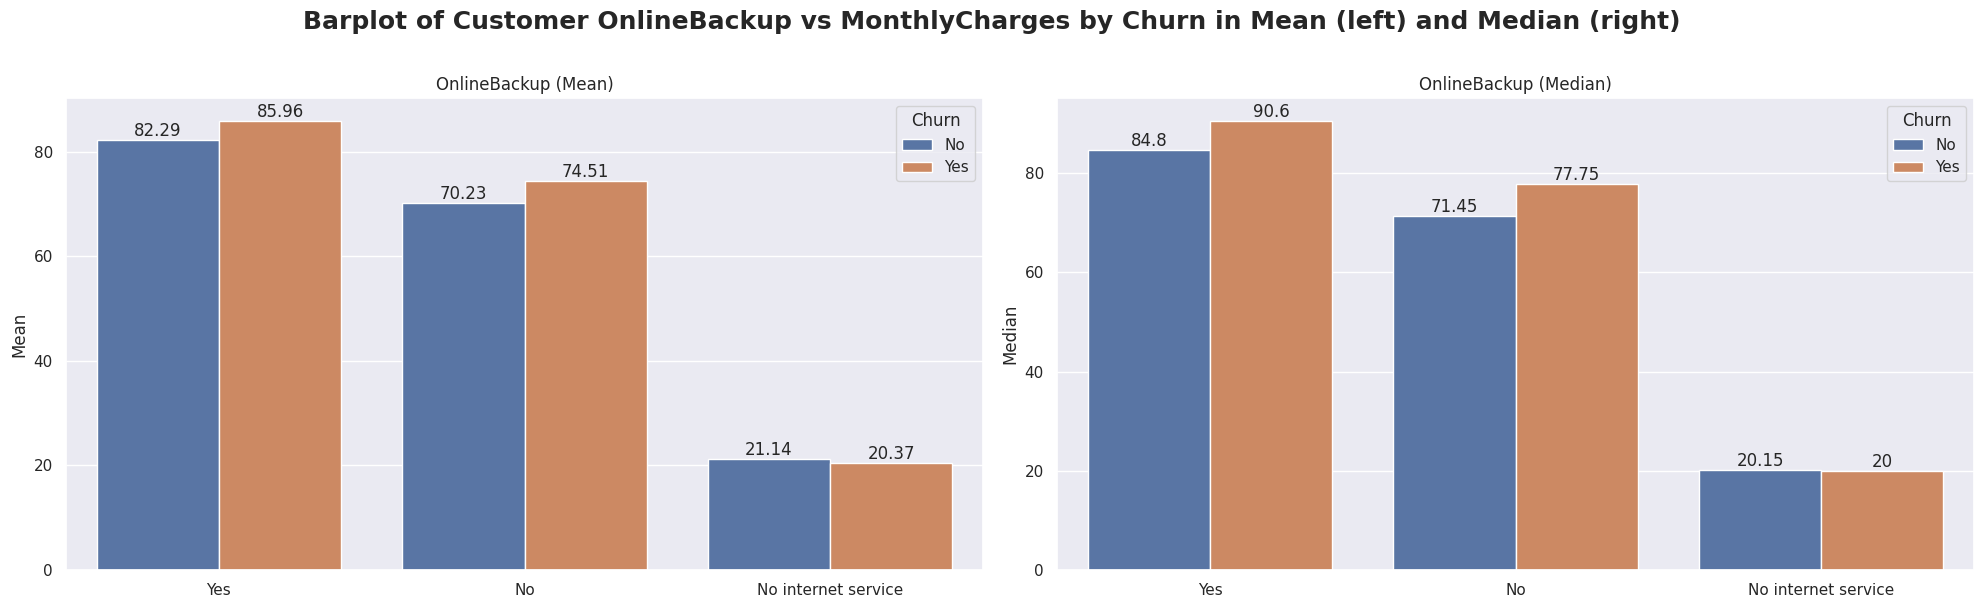

In [ ]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(20,6)
)

axes = axes.flatten()

sns.barplot(churn_df, x='OnlineBackup', y='MonthlyCharges', ax=axes[0], hue='Churn', errorbar=None, estimator='mean')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f')
axes[0].set_title(f'OnlineBackup (Mean)')
axes[0].set_xlabel('')
axes[0].set_ylabel('Mean')


sns.barplot(churn_df, x='OnlineBackup', y='MonthlyCharges', ax=axes[1], hue='Churn', errorbar=None, estimator='median')
for container in axes[1].containers:
    axes[1].bar_label(container)
axes[1].set_title(f'OnlineBackup (Median)')
axes[1].set_xlabel('')
axes[1].set_ylabel('Median')

plt.suptitle('Barplot of Customer OnlineBackup vs MonthlyCharges by Churn in Mean (left) and Median (right)', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('barplot of customer online backup vs monthly charges by churn.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

Insight:

Pelanggan dengan OnlineBackup (Yes):
- Rata-rata biaya bulanan untuk pelanggan yang churn (85,96) lebih tinggi dibandingkan yang tidak churn (82,29).
- Median biaya bulanan juga menunjukkan tren yang sama, di mana pelanggan yang churn membayar lebih (90,6) dibandingkan yang tidak churn (84,8).
- Insight: Pelanggan yang menggunakan layanan backup online dengan biaya lebih tinggi cenderung lebih rentan terhadap churn. Meskipun mereka membayar lebih, layanan ini tampaknya tidak cukup untuk mencegah mereka berhenti berlangganan.

Pelanggan tanpa OnlineBackup (No):
- Rata-rata biaya bulanan pelanggan yang churn (74,51) sedikit lebih tinggi dibandingkan dengan yang tidak churn (70,23).
- Median juga mengikuti tren yang sama, dengan pelanggan yang churn memiliki median biaya lebih tinggi (77,75) dibandingkan yang tidak churn (71,45).
- Insight: Pelanggan tanpa layanan backup online yang churn juga cenderung membayar lebih. Ini mungkin mengindikasikan bahwa meskipun mereka tidak menggunakan layanan backup, mereka tetap sensitif terhadap biaya bulanan yang lebih tinggi.

Pelanggan tanpa layanan internet:
- Rata-rata dan median biaya bulanan untuk pelanggan yang churn dan tidak churn hampir sama (sekitar 20-21).
- Insight: Pelanggan tanpa layanan internet tidak menunjukkan perbedaan signifikan dalam biaya bulanan terkait churn, mengindikasikan bahwa bagi mereka, keputusan untuk churn kemungkinan besar didorong oleh faktor lain di luar biaya bulanan.

Kesimpulan:
Pelanggan dengan layanan OnlineBackup yang membayar lebih tinggi cenderung lebih berisiko untuk churn, meskipun mereka membayar lebih dari pelanggan lain. Ini menunjukkan bahwa biaya yang lebih tinggi, meskipun terkait dengan penggunaan layanan tambahan seperti backup online, tidak menjamin retensi pelanggan. Pelanggan tanpa layanan backup juga menunjukkan pola serupa, di mana mereka yang churn membayar lebih tinggi, mengindikasikan bahwa biaya tetap menjadi faktor penting dalam keputusan churn, terlepas dari ada atau tidaknya layanan tambahan.

---

#### C. customer account information vs churn

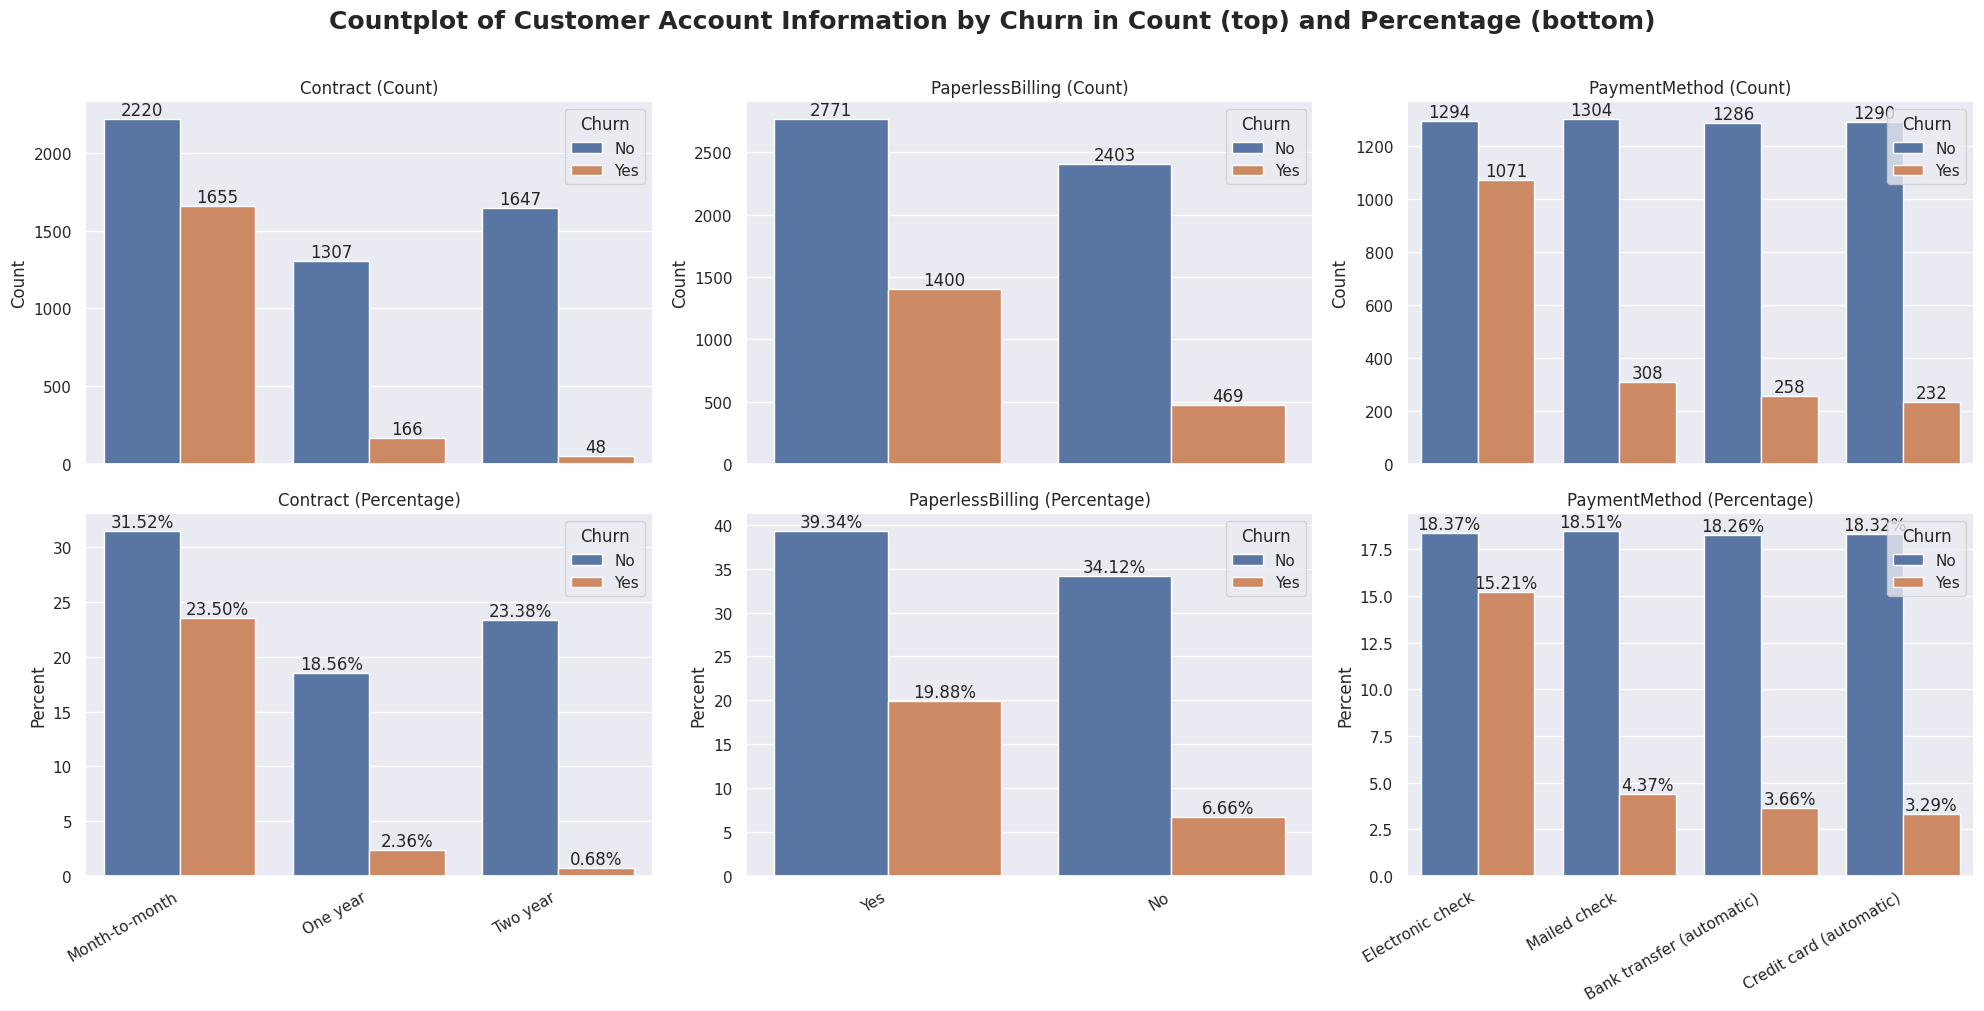

In [ ]:
fig, axes = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(20,10)
)

axes = axes.flatten()

for i, col in enumerate(account_info):
    sns.countplot(churn_df, x=col, ax=axes[i], hue='Churn')
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_title(f'{col} (Count)')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

for i, col in enumerate(account_info):
    i += 3
    sns.countplot(churn_df, x=col, ax=axes[i], hue='Churn', stat='percent')
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.2f%%')
    axes[i].set_title(f'{col} (Percentage)')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Percent')

fig.autofmt_xdate()

plt.suptitle('Countplot of Customer Account Information by Churn in Count (top) and Percentage (bottom)', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('countplot of customer account information by churn.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

**contract vs churn**

hampir setengah dari total keseluruhan customer yang memilih kontrak bulanan melakukan churn.

let's investigae

Q1: apakah rata-rata harga tagihan bulanan untuk kontrak bulanan lebih tinggi dibandingkan dengan kontrak lainnya pada customer yang churn?

In [ ]:
churn_df.query('Churn == "Yes"').groupby('Contract')['MonthlyCharges'].mean()

,MonthlyCharges
Contract,
Month-to-month,73.019396
One year,85.050904
Two year,86.777083


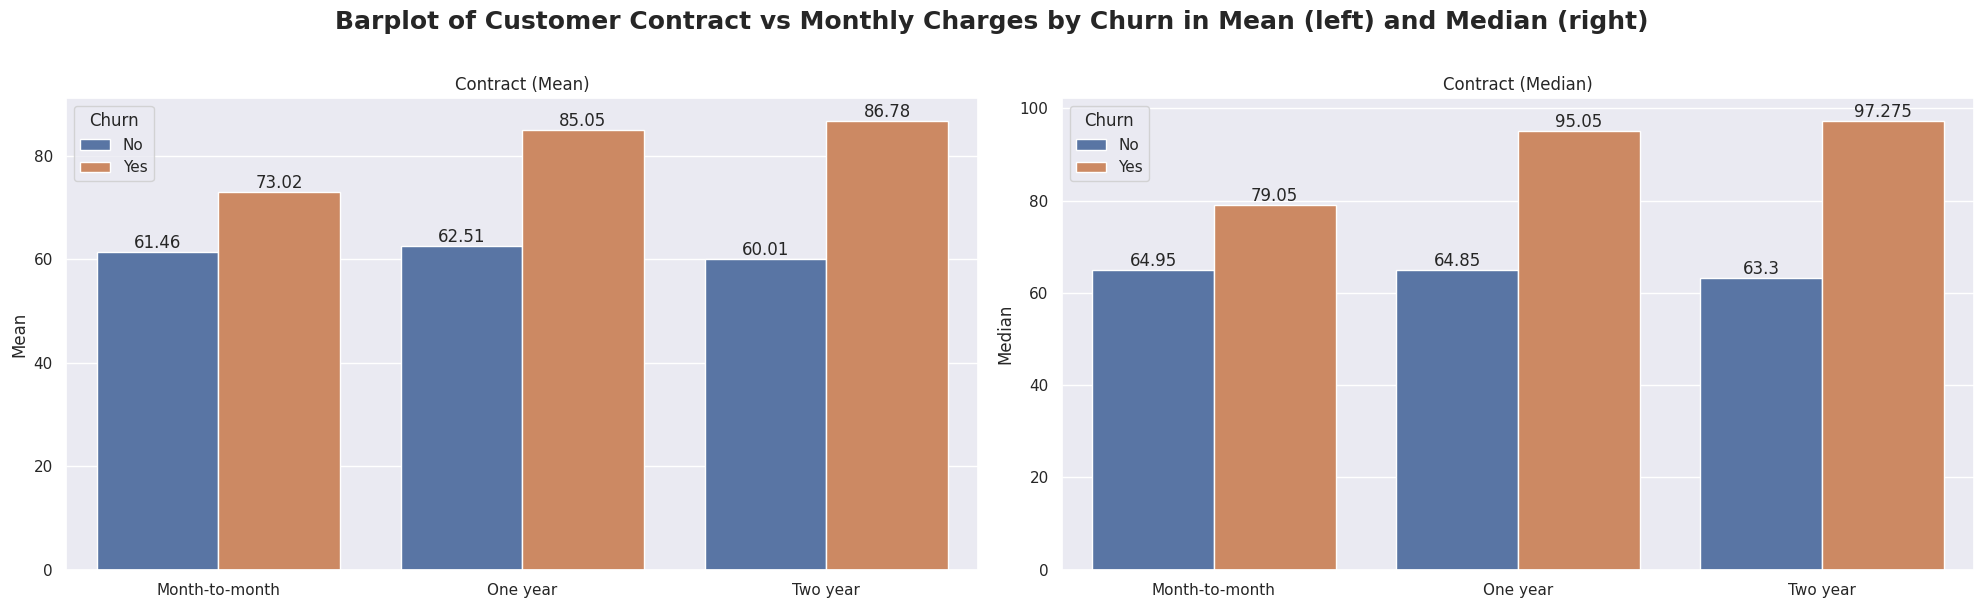

In [ ]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(20,6)
)

axes = axes.flatten()

sns.barplot(churn_df, x='Contract', y='MonthlyCharges', ax=axes[0], hue='Churn', errorbar=None, estimator='mean')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f')
axes[0].set_title(f'Contract (Mean)')
axes[0].set_xlabel('')
axes[0].set_ylabel('Mean')


sns.barplot(churn_df, x='Contract', y='MonthlyCharges', ax=axes[1], hue='Churn', errorbar=None, estimator='median')
for container in axes[1].containers:
    axes[1].bar_label(container)
axes[1].set_title(f'Contract (Median)')
axes[1].set_xlabel('')
axes[1].set_ylabel('Median')

plt.suptitle('Barplot of Customer Contract vs Monthly Charges by Churn in Mean (left) and Median (right)', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('barplot of customer contract vs monthly charges by churn.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

insight:
- pada customer yang churn rata-rata tagihan kontrak bulanan lebih rendah dibanding kontrak lainnya.
- rata-rata tagihan bulanan pada customer yang churn pada semua contract lebih tinggi dibandingkan dengan tagihan bulanan customer yang tidak churn. berlaku juga pada nilai mediannya.
- rata-rata tagihan bulnanan pada customer yang tidak churn cenderung sama. berlaku juga untuk nilai mediannya.

Q2 : apakah customer yang memilih kontrak bulanan merupakan customer dengan nilai tenure rendah atau dengan kata lain customer baru? (pada customer yang churn)

In [ ]:
churn_df.query('Churn == "Yes"').groupby('Contract')['tenure'].mean()

,tenure
Contract,
Month-to-month,14.016918
One year,44.963855
Two year,61.270833


In [ ]:
churn_df.query('Churn == "Yes"').groupby('Contract')['tenure'].median()

,tenure
Contract,
Month-to-month,7.0
One year,48.0
Two year,65.5


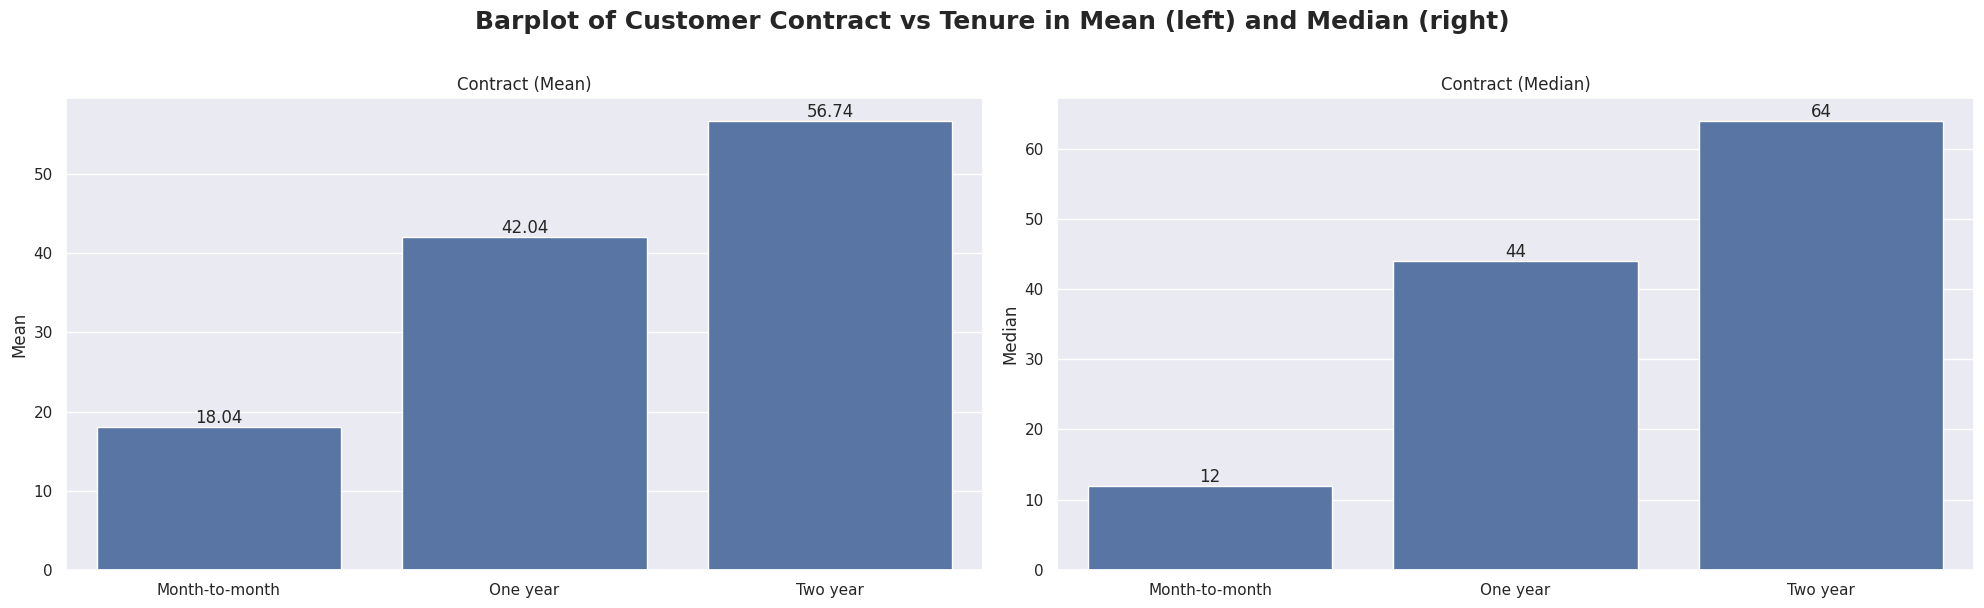

In [ ]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(20,6)
)

axes = axes.flatten()

sns.barplot(churn_df, x='Contract', y='tenure', ax=axes[0], errorbar=None, estimator='mean')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f')
axes[0].set_title(f'Contract (Mean)')
axes[0].set_xlabel('')
axes[0].set_ylabel('Mean')


sns.barplot(churn_df, x='Contract', y='tenure', ax=axes[1], errorbar=None, estimator='median')
for container in axes[1].containers:
    axes[1].bar_label(container)
axes[1].set_title(f'Contract (Median)')
axes[1].set_xlabel('')
axes[1].set_ylabel('Median')

plt.suptitle('Barplot of Customer Contract vs Tenure in Mean (left) and Median (right)', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('barplot of customer contract vs tenure.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

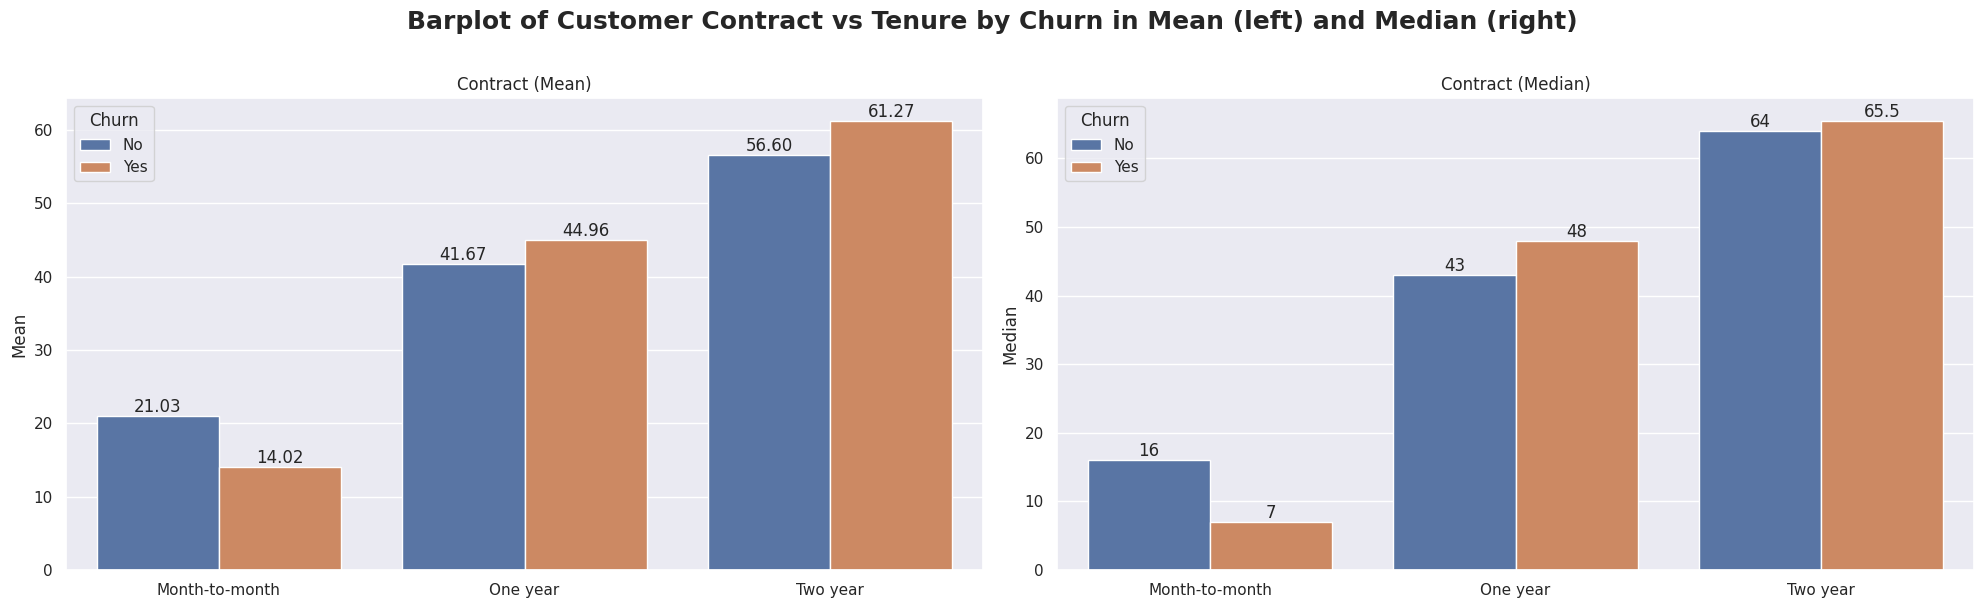

In [ ]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(20,6)
)

axes = axes.flatten()

sns.barplot(churn_df, x='Contract', y='tenure', ax=axes[0], hue='Churn', errorbar=None, estimator='mean')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f')
axes[0].set_title(f'Contract (Mean)')
axes[0].set_xlabel('')
axes[0].set_ylabel('Mean')


sns.barplot(churn_df, x='Contract', y='tenure', ax=axes[1], hue='Churn', errorbar=None, estimator='median')
for container in axes[1].containers:
    axes[1].bar_label(container)
axes[1].set_title(f'Contract (Median)')
axes[1].set_xlabel('')
axes[1].set_ylabel('Median')

plt.suptitle('Barplot of Customer Contract vs Tenure by Churn in Mean (left) and Median (right)', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('barplot of customer contract vs tenure by churn.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

insight:
- pelanggan dengan kontrak bulanan cenderung churn lebih awal, dibandingkan dengan pelanggan dengan kontrak satu tahun atau dua tahun. Ini mungkin disebabkan karena fleksibilitas dari kontrak bulanan, yang memudahkan pelanggan untuk berhenti kapan saja.
- pada kontrak bulanan, customer yang tidak churn memiliki rata-rata tenure yang lebih tinggi (21,03 bulan) dan median sebesar 16 bulan. Hal ini menunjukkan bahwa pelanggan yang bertahan cenderung memiliki durasi kontrak yang sedikit lebih lama dibandingkan dengan yang churn.

#### D. Numercial Variables vs Churn

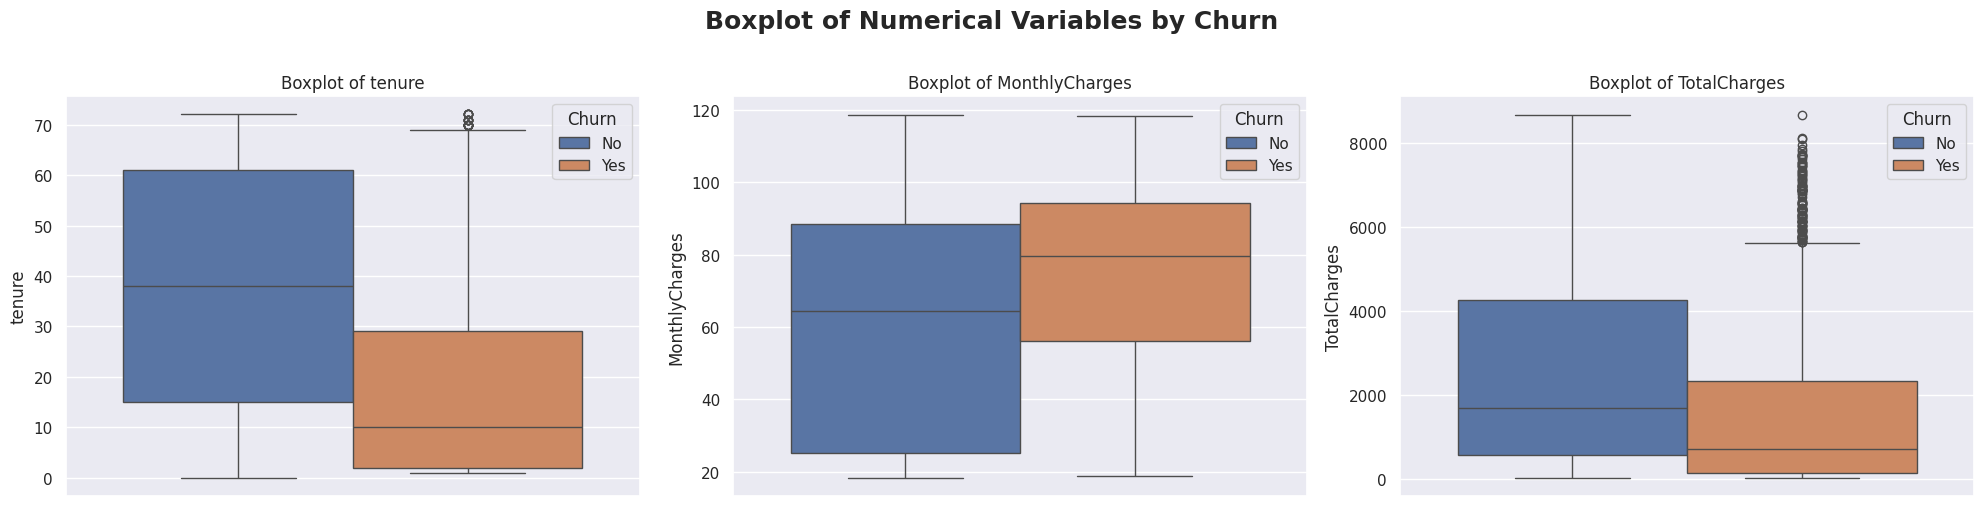

In [ ]:
fig, axes = plt.subplots(
    ncols=3,
    figsize=(20,5)
)

for i, col in enumerate(num_features):
    sns.boxplot(churn_df, y=col, ax=axes[i], hue='Churn')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

plt.suptitle('Boxplot of Numerical Variables by Churn', y=y_title, fontweight=title_weight, fontsize=title_size)
plt.tight_layout()

fig.savefig('boxplot of numerical variables by Churn.jpg', bbox_inches='tight', pad_inches=0.5)

plt.show()

In [ ]:
px.histogram(churn_df, x='tenure', color='Churn', title='Tenure Distribution by Churn', marginal='box', barmode='group')

- mayoritas customer yang berhenti berlangganan memiliki nilai tenure antara 2 hingga 29 bulan.
- median dari customer yang berhenti berlangganan cenderung lebih rendah dibandingkan dengan customer yang masih berlangganan.

In [ ]:
px.histogram(churn_df, x='MonthlyCharges', color='Churn', title='Monthly Charges Distribution', marginal='box', barmode='group')

- mayoritas customer yang berhenti berlangganan memiliki nilai monthly charges antara 56.15 hingga 94.21,
- median monthly charges dari customer yang berhenti berlangganan lebih tinggi dibandingkan dengan customer yang masih berlangganan.

In [ ]:
px.histogram(churn_df, x='TotalCharges', color='Churn', title='Total Charges Distribution', marginal='box', barmode='group')

karena Total charges merupakan hasil perkalian dair tenure dan monthly charges maka nilai dari total charges bergantung pada kedua variabel tersebut.

#### E. monhtly charges, tenure, total charges terhadap churn

*1. Hipotesis:*

- H0: Tidak ada perbedaan signifikan pada rata-rata variabel (Monthly Charges, Tenure, Total Charges) antara pelanggan yang churn dan tidak churn.
- HA: Ada perbedaan signifikan pada rata-rata variabel (Monthly Charges, Tenure, Total Charges) antara pelanggan yang churn dan tidak churn.

*2. Nilai Signifikansi:*

Nilai alpha = 0.05.

*3. Uji Statistik:*

In [ ]:
import scipy.stats as stats

# Membagi data menjadi dua kelompok (churn dan tidak churn)
churn_yes = churn_df[churn_df['Churn'] == 'Yes']
churn_no = dchurn_dff[churn_df['Churn'] == 'No']

# Uji t-test untuk Monthly Charges
t_stat, p_value = stats.ttest_ind(churn_yes['MonthlyCharges'], churn_no['MonthlyCharges'], equal_var=False)
print(f"Monthly Charges: t-statistic = {t_stat}, p-value = {p_value}")

# Uji t-test untuk Tenure
t_stat, p_value = stats.ttest_ind(churn_yes['tenure'], churn_no['tenure'], equal_var=False)
print(f"Tenure: t-statistic = {t_stat}, p-value = {p_value}")

# Uji t-test untuk Total Charges
t_stat, p_value = stats.ttest_ind(churn_yes['TotalCharges'], churn_no['TotalCharges'], equal_var=False)
print(f"Total Charges: t-statistic = {t_stat}, p-value = {p_value}")

Monthly Charges: t-statistic = 18.407526676414673, p-value = 8.59244933154705e-73
Tenure: t-statistic = -34.823818696312976, p-value = 1.1954945472607151e-232
Total Charges: t-statistic = -18.708507454971517, p-value = 5.714798949750055e-75


*4. Kesimpulan*

a. Monthly Charges:

- Nilai t-statistik: 18.41
- Nilai p-value: 8.59e-73 (sangat kecil, mendekati nol)
- Karena p-value < alpha (0.05), maka H0 ditolak.
- Kesimpulan: Terdapat perbedaan rata-rata yang signifikan dalam Monthly Charges antara pelanggan yang churn dan tidak churn. Pelanggan yang churn cenderung memiliki rata-rata biaya bulanan yang berbeda dibandingkan dengan yang tidak churn.

b. Tenure:

- Nilai t-statistik: -34.82
- Nilai p-value: 1.20e-232 (sangat kecil, mendekati nol)
- Karena p-value < alpha (0.05), maka H0 ditolak.
- Kesimpulan: Terdapat perbedaan rata-rata yang signifikan dalam Tenure antara pelanggan yang churn dan tidak churn. Pelanggan yang churn cenderung memiliki lama berlangganan yang berbeda dibandingkan dengan yang tidak churn.

c. Total Charges:

- Nilai t-statistik: -18.71
- Nilai p-value: 5.71e-75 (sangat kecil, mendekati nol)
- Karena p-value < alpha (0.05), maka H0 ditolak.
- Kesimpulan: Terdapat perbedaan rata-rata yang signifikan dalam Total Charges antara pelanggan yang churn dan tidak churn. Pelanggan yang churn cenderung memiliki total biaya yang berbeda dibandingkan dengan yang tidak churn.

Dari hasil uji hipotesis untuk ketiga variabel (Monthly Charges, Tenure, dan Total Charges), ditemukan bahwa ada perbedaan signifikan dalam rata-rata ketiga variabel tersebut antara pelanggan yang churn dan yang tidak churn. Hal ini menunjukkan bahwa biaya bulanan, lama berlangganan, dan total biaya memiliki pengaruh terhadap keputusan pelanggan untuk churn atau tidak.

## 3.3. Feature Selection

### 3.3.1. Filter Method

In [ ]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


phone servics dan gender kami anggap sebagai feature yang kurang berguna sehingga

In [ ]:
churn_df.drop(['gender', 'PhoneService'], axis=1, inplace=True)

In [ ]:
churn_df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3.4. Encoding

In [ ]:
churn_df.nunique()

,0
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3
DeviceProtection,3
TechSupport,3


In [ ]:
print(churn_df.nunique().iloc[4:-6].index.tolist())

['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


In [ ]:
ohe_features = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                'StreamingMovies', 'PaymentMethod']

In [ ]:
# one-hot encoding
churn_df_encoded = pd.get_dummies(churn_df, columns=ohe_features, dtype=int)
churn_df_encoded

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,Yes,No,1,Month-to-month,Yes,29.85,29.85,No,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,No,No,34,One year,No,56.95,1889.50,No,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1
2,0,No,No,2,Month-to-month,Yes,53.85,108.15,Yes,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,No,No,45,One year,No,42.30,1840.75,No,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0
4,0,No,No,2,Month-to-month,Yes,70.70,151.65,Yes,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,One year,Yes,84.80,1990.50,No,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
7039,0,Yes,Yes,72,One year,Yes,103.20,7362.90,No,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0
7040,0,Yes,Yes,11,Month-to-month,Yes,29.60,346.45,No,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,Yes,No,4,Month-to-month,Yes,74.40,306.60,Yes,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
# label encoder
churn_df_encoded = churn_df_encoded.replace({'Yes':1, 'No':0})
churn_df_encoded

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,Month-to-month,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,One year,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1
2,0,0,0,2,Month-to-month,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,One year,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0
4,0,0,0,2,Month-to-month,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,One year,1,84.80,1990.50,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
7039,0,1,1,72,One year,1,103.20,7362.90,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0
7040,0,1,1,11,Month-to-month,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,4,Month-to-month,1,74.40,306.60,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
churn_df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
# ordinal encoder
churn_df_encoded = churn_df_encoded.replace({
                        'Month-to-month':1,
                        'One year':12,
                        'Two year':24})
churn_df_encoded

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,12,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,12,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,12,1,84.80,1990.50,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
7039,0,1,1,72,12,1,103.20,7362.90,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0
7040,0,1,1,11,1,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,4,1,1,74.40,306.60,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
churn_df_encoded['SeniorCitizen'] = churn_df_encoded['SeniorCitizen'].astype(int)

In [ ]:
churn_df_encoded.dtypes

,0
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
Contract,int64
PaperlessBilling,int64
MonthlyCharges,float64
TotalCharges,float64
Churn,int64
MultipleLines_No,int64


In [ ]:
churn_df_encoded.head().shape

(5, 37)

In [ ]:
X = churn_df_encoded.drop('Churn', axis=1)
y = churn_df_encoded['Churn']

## 3.5. Resampling

In [ ]:
reesampler = SMOTE(random_state=0)
X_resampled, y_resampled = reesampler.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

,count
Churn,
0,5174
1,5174


Untuk mengatasi masalah ketidakseimbangan data, kita menggunakan SMOTE, atau Synthetic Minority Over-sampling Technique, yang merupakan teknik untuk membuat data sintetis bagi kategori yang kurang terwakili dari kombinasi antara sampel yang ada di dalam kelas minoritas.

Setelah menerapkan SMOTE, kita mendapatkan jumlah pelanggan yang tidak pergi dan yang pergi menjadi seimbang, masing-masing 5174.

## 3.6. Feature Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.shape

(7043, 36)

In [ ]:
scaler_2 = StandardScaler()
X_resampled_scaled = scaler_2.fit_transform(X_resampled)

In [ ]:
X_resampled_scaled

array([[-0.39440532,  1.28634938, -0.52771004, ..., -0.42354889,
         1.37348877, -0.46888321],
       [-0.39440532, -0.77739378, -0.52771004, ..., -0.42354889,
        -0.72807293,  2.13272724],
       [-0.39440532, -0.77739378, -0.52771004, ..., -0.42354889,
        -0.72807293,  2.13272724],
       ...,
       [-0.39440532, -0.77739378, -0.52771004, ..., -0.42354889,
        -0.72807293, -0.46888321],
       [-0.39440532, -0.77739378, -0.52771004, ..., -0.42354889,
        -0.72807293, -0.46888321],
       [-0.39440532, -0.77739378, -0.52771004, ..., -0.42354889,
        -0.72807293, -0.46888321]])

In [ ]:
X_resampled_scaled.shape

(10348, 36)

## 3.7. Splitting Data

In [ ]:
# encoded
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# encoded, resampled
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42, stratify=y_resampled)

# scaled
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.33, random_state=42, stratify=y)

# scaled, resampled
X_train_res_scaled, X_test_res_scaled, y_train_res_scaled, y_test_res_scaled = train_test_split(X_resampled_scaled, y_resampled, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4718, 36), (2325, 36), (4718,), (2325,))

# 4. Modeling

## 4.1. Modeling Technique

## 5.1 Base Model

### 5.1.1. Encoded

Training
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3466
           1       0.92      0.87      0.89      1252

    accuracy                           0.94      4718
   macro avg       0.93      0.92      0.93      4718
weighted avg       0.94      0.94      0.94      4718


Testing
              precision    recall  f1-score   support

           0       0.83      0.89      0.85      1708
           1       0.60      0.48      0.54       617

    accuracy                           0.78      2325
   macro avg       0.71      0.68      0.70      2325
weighted avg       0.77      0.78      0.77      2325



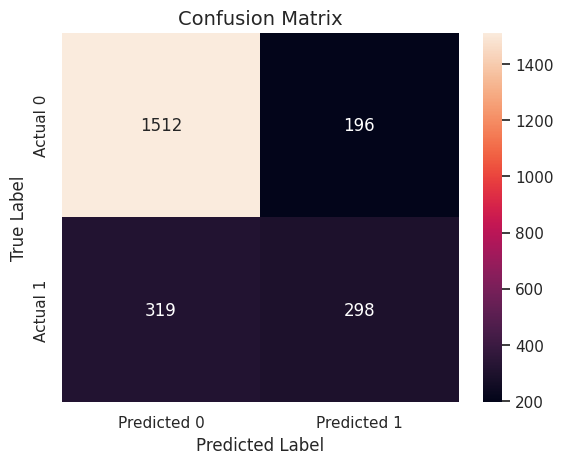

In [ ]:
# training
print('Training')
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

print(classification_report(y_train, y_train_pred))

y_test_pred = model.predict(X_test)

print()
print('Testing')
print(classification_report(y_test, y_test_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 5.1.2. Encoded, Resampled

Training
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3466
           1       0.95      0.96      0.96      3467

    accuracy                           0.96      6933
   macro avg       0.96      0.96      0.96      6933
weighted avg       0.96      0.96      0.96      6933


Testing
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1708
           1       0.85      0.84      0.85      1707

    accuracy                           0.85      3415
   macro avg       0.85      0.85      0.85      3415
weighted avg       0.85      0.85      0.85      3415



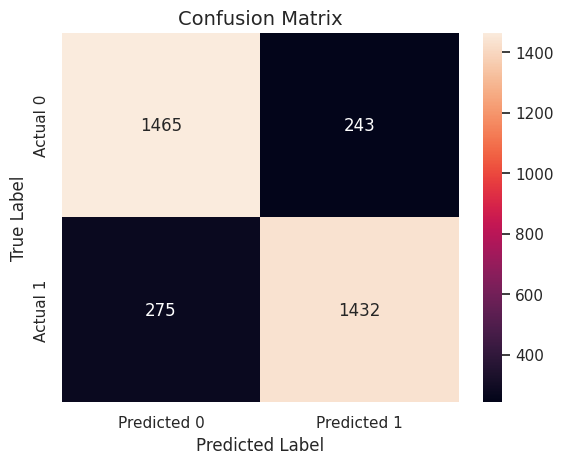

In [ ]:
# training
print('Training')
model = XGBClassifier(random_state=42)
model.fit(X_train_res, y_train_res)
y_train_pred = model.predict(X_train_res)

print(classification_report(y_train_res, y_train_pred))

y_test_pred = model.predict(X_test_res)

print()
print('Testing')
print(classification_report(y_test_res, y_test_pred))

sns.heatmap(confusion_matrix(y_test_res, y_test_pred), annot=True, fmt='d',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 5.1.3. Scaled

Training
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3466
           1       0.92      0.87      0.89      1252

    accuracy                           0.94      4718
   macro avg       0.93      0.92      0.93      4718
weighted avg       0.94      0.94      0.94      4718


Testing
              precision    recall  f1-score   support

           0       0.83      0.89      0.85      1708
           1       0.60      0.48      0.54       617

    accuracy                           0.78      2325
   macro avg       0.71      0.68      0.70      2325
weighted avg       0.77      0.78      0.77      2325



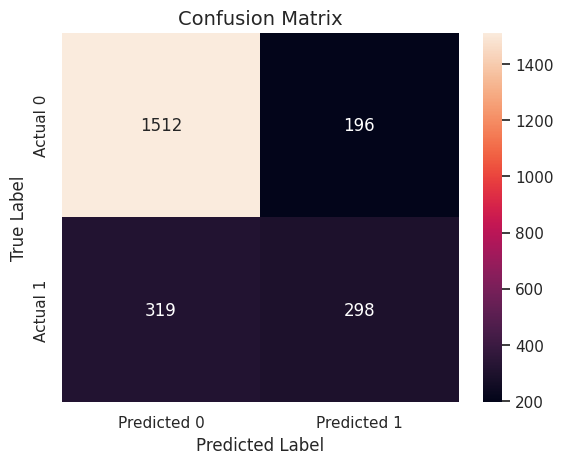

In [ ]:
# training
print('Training')
model = XGBClassifier(random_state=42)
model.fit(X_train_scaled, y_train_scaled)
y_train_pred = model.predict(X_train_scaled)

print(classification_report(y_train_scaled, y_train_pred))

y_test_pred = model.predict(X_test_scaled)

print()
print('Testing')
print(classification_report(y_test_scaled, y_test_pred))

sns.heatmap(confusion_matrix(y_test_scaled, y_test_pred), annot=True, fmt='d',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 5.1.4. Scaled, Resampled

Training
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3444
           1       0.96      0.97      0.96      3489

    accuracy                           0.96      6933
   macro avg       0.96      0.96      0.96      6933
weighted avg       0.96      0.96      0.96      6933


Testing
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1730
           1       0.85      0.85      0.85      1685

    accuracy                           0.85      3415
   macro avg       0.85      0.85      0.85      3415
weighted avg       0.85      0.85      0.85      3415



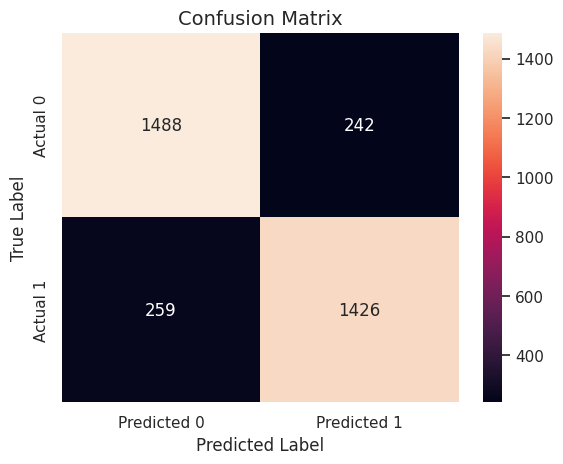

In [ ]:
# training
print('Training')
model = XGBClassifier(random_state=42)
model.fit(X_train_res_scaled, y_train_res_scaled)
y_train_pred = model.predict(X_train_res_scaled)

print(classification_report(y_train_res_scaled, y_train_pred))

y_test_pred = model.predict(X_test_res_scaled)

print()
print('Testing')
print(classification_report(y_test_res_scaled, y_test_pred))

sns.heatmap(confusion_matrix(y_test_res_scaled, y_test_pred), annot=True, fmt='d',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- pada tree-based classifier hasil evaluasi model yang dihasilkan dari proses feature scaling mirip dengan proses tanpa feature scaling
- hasil mdoel dengan resampling lebih bagus dibandingkan dengan model dengan data sebelum resampling
- tahapan berikutnya akan kami gunakan data resampling tanpa scaling

## 5.2. Hyperparameter Tuning

### 5.2.1. optuna

In [ ]:
from os import terminal_size
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 500, step=50)
    max_depth = trial.suggest_int("max_depth", 1, 32)
    lr = trial.suggest_float('learning_rate', 0.01, 0.2, step=0.01)
    sub_sample = trial.suggest_float('subsample', 0.5, 1.0, step=0.1)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0, step=0.1)

    clf = XGBClassifier(n_estimators=n_estimators,
                        max_depth=max_depth,
                        learning_rate=lr,
                        sub_sample=sub_sample,
                        colsample_bytree=colsample_bytree,
                        eval_metric='logloss',
                        random_state=42)  # Define the model.

    return cross_val_score(
        clf, X_train_res, y_train_res, n_jobs=-1, cv=10
    ).mean()  # Train and evaluate the model.

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

trial = study.best_trial

print()
print("Accuracy: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2024-10-04 10:45:38,330] A new study created in memory with name: no-name-e45f0639-4963-4e8e-a3ee-6ec5dbc5ad19
[I 2024-10-04 10:45:50,639] Trial 0 finished with value: 0.841912330384953 and parameters: {'n_estimators': 450, 'max_depth': 10, 'learning_rate': 0.12, 'subsample': 0.8, 'colsample_bytree': 0.7}. Best is trial 0 with value: 0.841912330384953.
[I 2024-10-04 10:45:56,270] Trial 1 finished with value: 0.8434981764952948 and parameters: {'n_estimators': 250, 'max_depth': 10, 'learning_rate': 0.13, 'subsample': 0.8, 'colsample_bytree': 0.9}. Best is trial 1 with value: 0.8434981764952948.
[I 2024-10-04 10:46:07,223] Trial 2 finished with value: 0.8413349218824724 and parameters: {'n_estimators': 250, 'max_depth': 28, 'learning_rate': 0.16, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 1 with value: 0.8434981764952948.
[I 2024-10-04 10:46:12,871] Trial 3 finished with value: 0.8458038599248973 and parameters: {'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1


Accuracy: 0.8528731115186445
Best hyperparameters: {'n_estimators': 350, 'max_depth': 18, 'learning_rate': 0.01, 'subsample': 0.5, 'colsample_bytree': 0.6}


### 5.2.2. Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Inisialisasi model XGBoost
model_xgb = XGBClassifier(eval_metric='logloss')

# RandomizedSearchCV
random_search = RandomizedSearchCV(model_xgb, param_distributions=param_grid,
                                   n_iter=50, scoring='accuracy',
                                   cv=10, verbose=1, random_state=42, n_jobs=-1)

# Melatih model dengan RandomizedSearchCV
random_search.fit(X_train_res, y_train_res)

# Menampilkan hasil terbaik
print(f"Best Hyperparameters: {random_search.best_params_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


## 5.3. Model with Best Params

### 5.3.1. Optuna

In [ ]:
trial.params

{'n_estimators': 350,
 'max_depth': 18,
 'learning_rate': 0.01,
 'subsample': 0.5,
 'colsample_bytree': 0.6}

Training
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3466
           1       0.94      0.93      0.94      3467

    accuracy                           0.94      6933
   macro avg       0.94      0.94      0.94      6933
weighted avg       0.94      0.94      0.94      6933


Testing
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1708
           1       0.85      0.87      0.86      1707

    accuracy                           0.86      3415
   macro avg       0.86      0.86      0.86      3415
weighted avg       0.86      0.86      0.86      3415



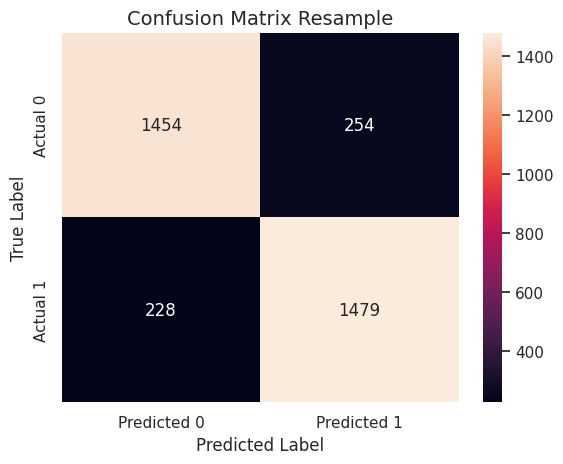

In [ ]:
# training
print('Training')
model = XGBClassifier(subsample=0.5,
                      n_estimators=350,
                      max_depth=18,
                      learning_rate=0.01,
                      colsample_bytree=0.6,
                      eval_metric='logloss',
                      random_state=42)
model.fit(X_train_res, y_train_res)
y_train_pred_res = model.predict(X_train_res)

print(classification_report(y_train_res, y_train_pred_res))

y_test_pred_res = model.predict(X_test_res)

print()
# testing
print('Testing')
print(classification_report(y_test_res, y_test_pred_res))

sns.heatmap(confusion_matrix(y_test_res, y_test_pred_res), annot=True, fmt='d',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix Resample', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 5.3.2. Randomized Search CV

In [ ]:
random_search.best_params_

{'subsample': 1.0,
 'n_estimators': 300,
 'max_depth': 5,
 'learning_rate': 0.05,
 'colsample_bytree': 0.8}

Training
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      3466
           1       0.90      0.89      0.90      3467

    accuracy                           0.90      6933
   macro avg       0.90      0.90      0.90      6933
weighted avg       0.90      0.90      0.90      6933


Testing
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1708
           1       0.86      0.85      0.85      1707

    accuracy                           0.86      3415
   macro avg       0.86      0.86      0.86      3415
weighted avg       0.86      0.86      0.86      3415



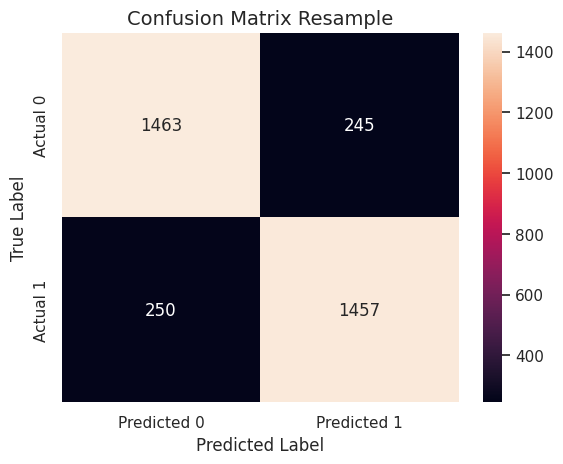

In [ ]:
# training
print('Training')
model_2 = XGBClassifier(subsample=1.0,
                      n_estimators=300,
                      max_depth=5,
                      learning_rate=0.05,
                      colsample_bytree=0.8,
                      eval_metric='logloss',
                      random_state=42)
model_2.fit(X_train_res, y_train_res)
y_train_pred_res = model_2.predict(X_train_res)

print(classification_report(y_train_res, y_train_pred_res))

y_test_pred_res = model_2.predict(X_test_res)

print()
# testing
print('Testing')
print(classification_report(y_test_res, y_test_pred_res))

sns.heatmap(confusion_matrix(y_test_res, y_test_pred_res), annot=True, fmt='d',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix Resample', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 5.4. Model Selection

Dari hasil classification report, metric pengukuran yang kami utamakan adalah metric yang memperkecil type 2 error atau disebut dengan false negative. type 2 error terjadi saat gagal menolak H0 padahal H0 salah. dengan kata lain model memprediksi customer tidak churn padahal kenyatannya customer tersebut akan churn. metric yang diguunakan untuk memperkecil type 2 error adalah recall. sehingga model dengan recall tertinggi akan kami pilih. model dengan nilai recall tertinggi adalah **model dengan data encoded-resampled kemudian melalui proses hyperparams tuning dengan menggunakan optuna.**

# 6. Save Best Model

In [ ]:
import pickle
im

In [ ]:
pickle.dump(model, open('churn_prediction_best_model.sav', 'wb'))

# 7. Kesimpulan

Dari hasil analisis, kita menemukan bahwa pelanggan dengan biaya bulanan tinggi, terutama yang menggunakan layanan premium seperti Fiber Optic, lebih sering berhenti berlangganan. Alasan mereka berhenti bukan hanya karena harga, tapi juga karena pengalaman penggunaan layanan. Untuk mengatasi ini, kita bisa menawarkan program loyalitas yang lebih personal, seperti reward atau layanan eksklusif, agar mereka merasa dihargai. Selain itu, model prediksi churn yang telah dikembangkan memiliki akurasi terbaik sebesar di atas 80%, yang membantu mendeteksi pelanggan berisiko lebih awal sehingga kita bisa bertindak sebelum mereka benar-benar berhenti.